In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/red-wine-quality-cortez-et-al-2009


In [ ]:
cd /kaggle/input/red-wine-quality-cortez-et-al-2009

/kaggle/input/red-wine-quality-cortez-et-al-2009


In [ ]:
cd /root/.cache/kagglehub/datasets/uciml/red-wine-quality-cortez-et-al-2009/versions/2

[Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/uciml/red-wine-quality-cortez-et-al-2009/versions/2'
/kaggle/input/red-wine-quality-cortez-et-al-2009


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('winequality-red.csv')
df.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar':'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
    }, inplace=True)

Feature description
1. fixed acidity         most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
2. volatile acidity      the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. citric acid           found in small quantities, citric acid can add 'freshness' and flavor to wines
4. residual sugar        the amount of sugar remaining after fermentation stops,
5.                       it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
6. chlorides             the amount of salt in the wine
7. free sulfur dioxide   the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion, it prevents microbial growth (killing bacterial) and the oxidation of wine (which make wine taste stale-'flat'), it is the portion that is actively protect the wine. Too much -> make wine smell like chemical, too little -> the wine is vunerable to compromise
8. total sulfur dioxide  amount of free forms of S02 (still active) and bound forms of S02 (no longer active - already reacted with other stuff-sugar, acid,...); in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
9. density               the density of water is close to that of water depending on the percent alcohol and sugar content
10. pH                    describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
11. sulphates             a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
12. alcohol               the percent alcohol content of the wine

# Cleaning

## Check data consistency

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All feature and target has the same numeric type, this is good, let's proceed...

But note we only have 1599 rows to work with, that's too few !!!

## Handle missing value

In [ ]:
df.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


We have no missing value here.

## Remove duplicated

In [ ]:
# check duplicated
print('duplicated rows:', df.duplicated().sum())

# drop duplicated
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

# row count left
print('remain rows:', len(df))

duplicated rows: 240
remain rows: 1359


After checked and removed dup rows, we got 85% of the original datasets left

# Exploring

We will check peason correlation heat map, strongly correlated features can be redundancy affecing model performance.

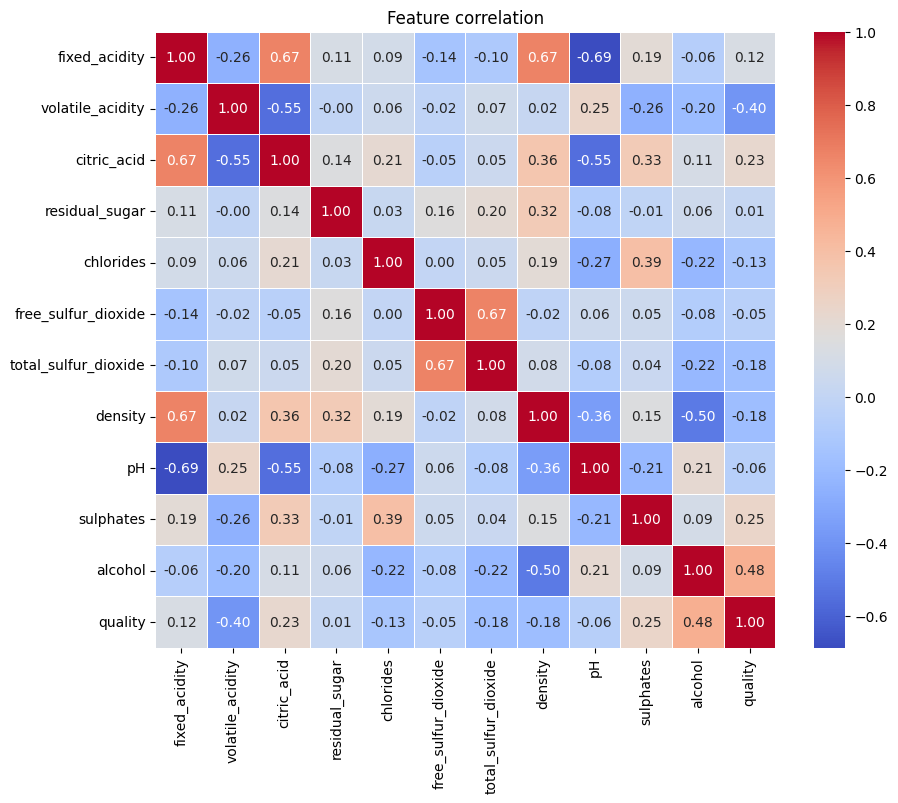

In [ ]:
corr_mx = df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mx, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature correlation')
plt.show()

Based on this heatmap, we can see that `(pH, fixed acidity)`, `(density, fixed acidity)`, `(citric acid, fixed acidity)` are pretty strong correlated but not enough to be considered redundancy.

Next we will find distribution of each features and check for any outliers

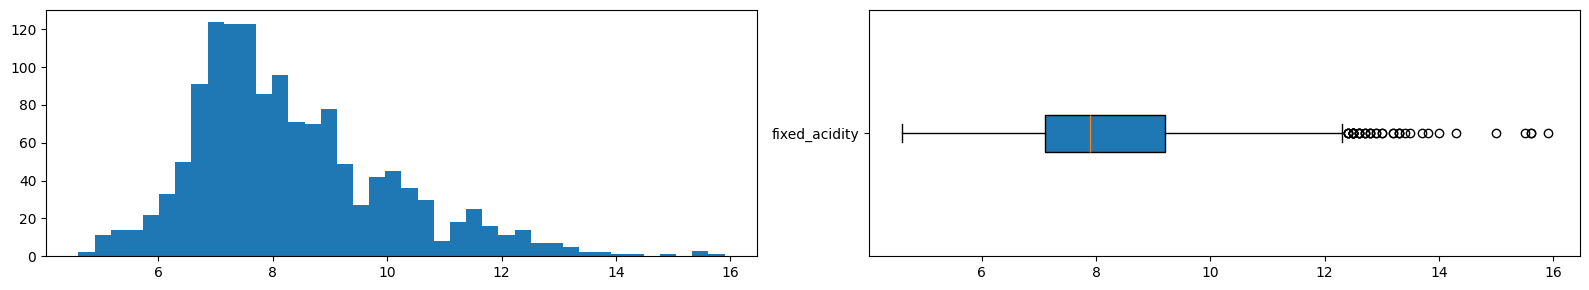

quatile_min: 3.95, q25: 7.1, q50: 7.9, q75: 9.2, quatile_max: 12.349999999999998
outliers: 41


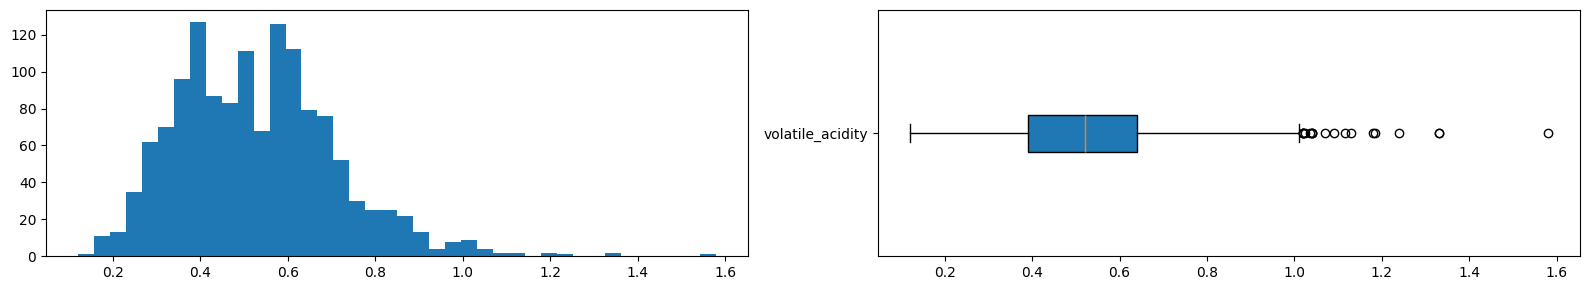

quatile_min: 0.015000000000000013, q25: 0.39, q50: 0.52, q75: 0.64, quatile_max: 1.0150000000000001
outliers: 19


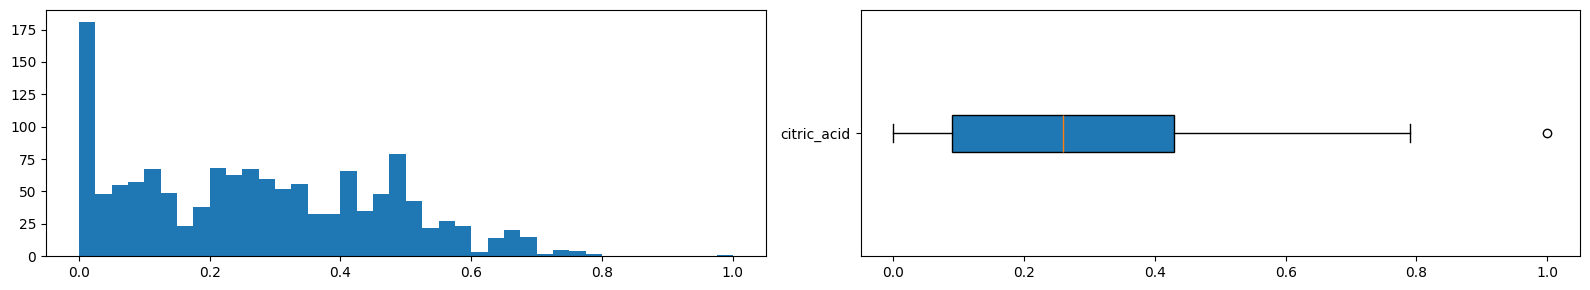

quatile_min: -0.42000000000000004, q25: 0.09, q50: 0.26, q75: 0.43, quatile_max: 0.94
outliers: 1


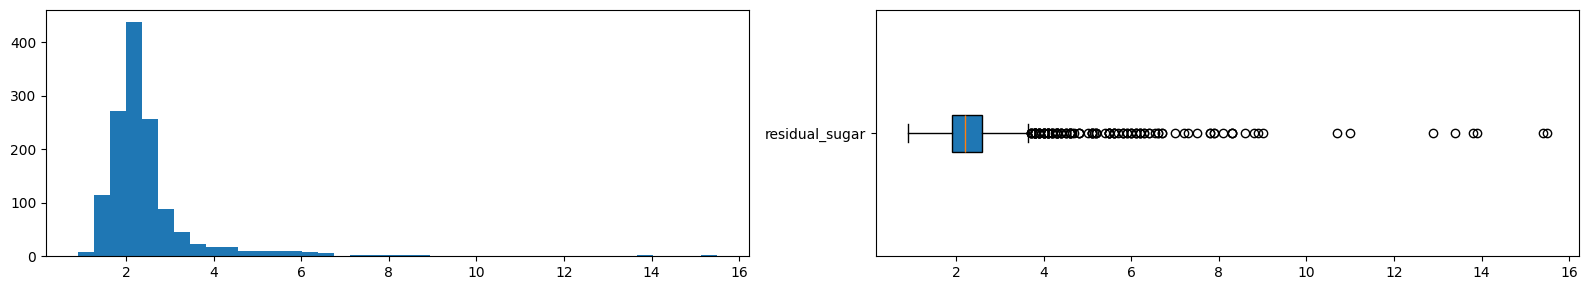

quatile_min: 0.8499999999999996, q25: 1.9, q50: 2.2, q75: 2.6, quatile_max: 3.6500000000000004
outliers: 126


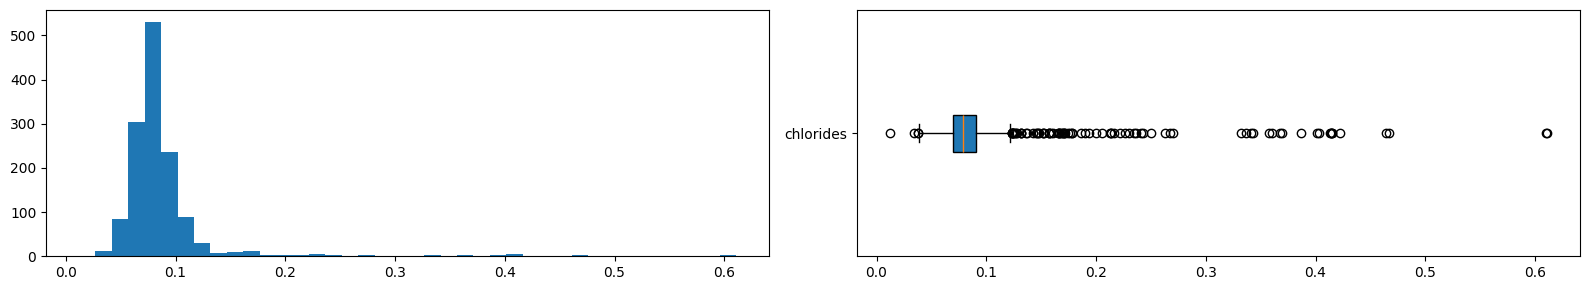

quatile_min: 0.03850000000000002, q25: 0.07, q50: 0.079, q75: 0.091, quatile_max: 0.12249999999999998
outliers: 87


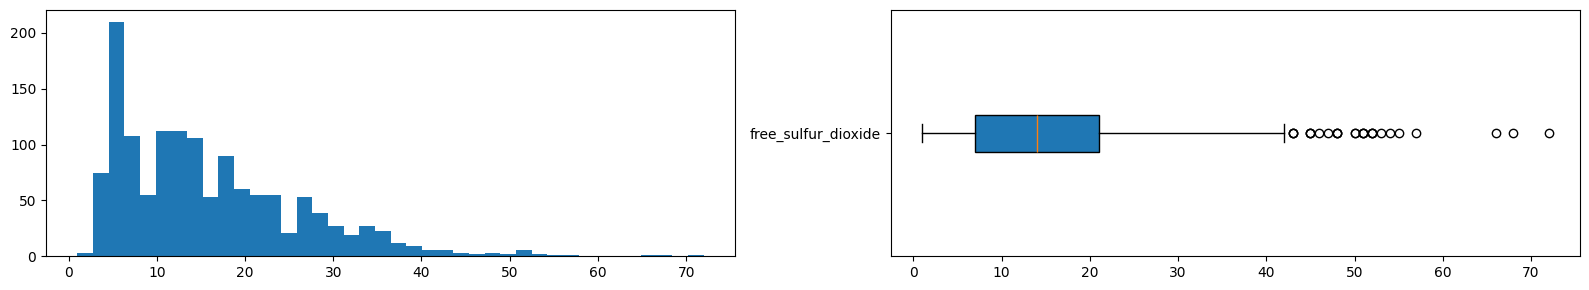

quatile_min: -14.0, q25: 7.0, q50: 14.0, q75: 21.0, quatile_max: 42.0
outliers: 26


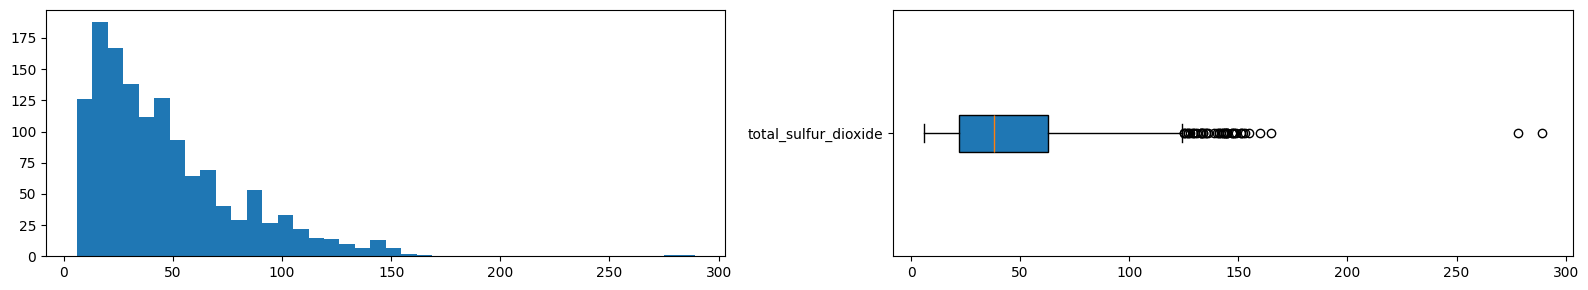

quatile_min: -39.5, q25: 22.0, q50: 38.0, q75: 63.0, quatile_max: 124.5
outliers: 45


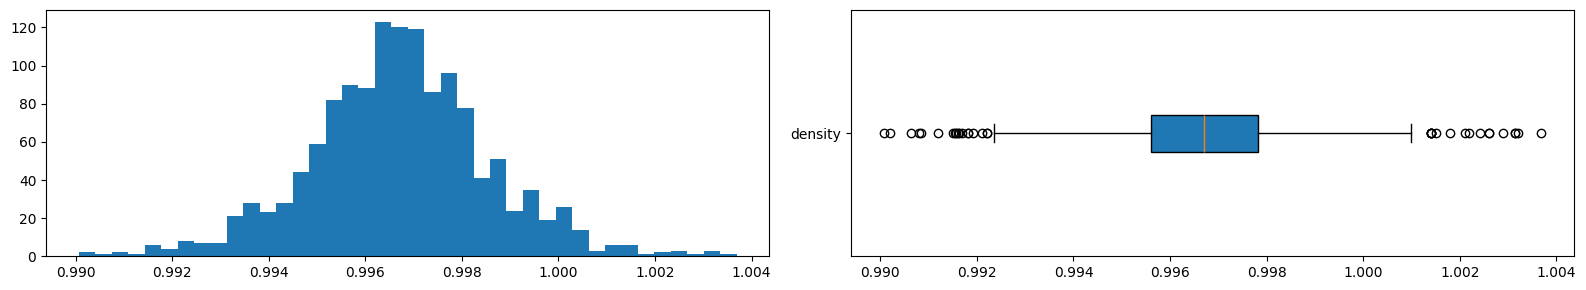

quatile_min: 0.99227, q25: 0.9956, q50: 0.9967, q75: 0.99782, quatile_max: 1.00115
outliers: 35


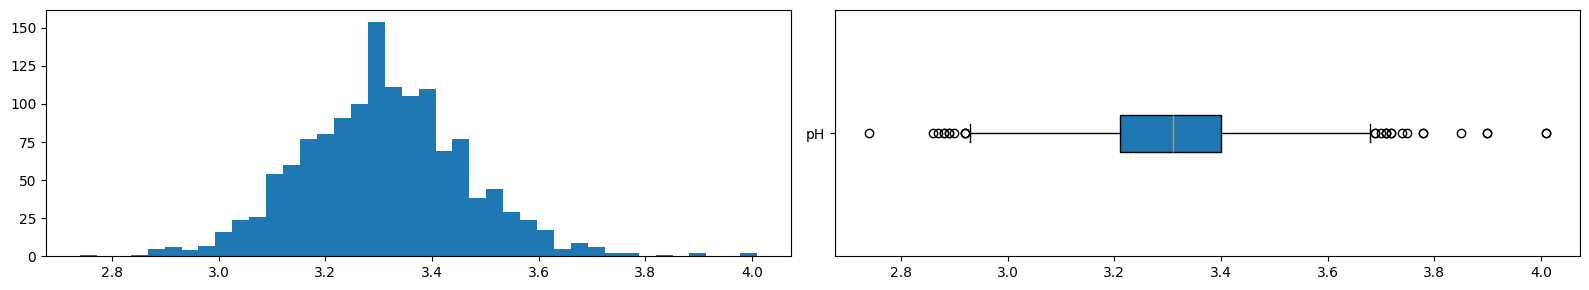

quatile_min: 2.925, q25: 3.21, q50: 3.31, q75: 3.4, quatile_max: 3.6849999999999996
outliers: 28


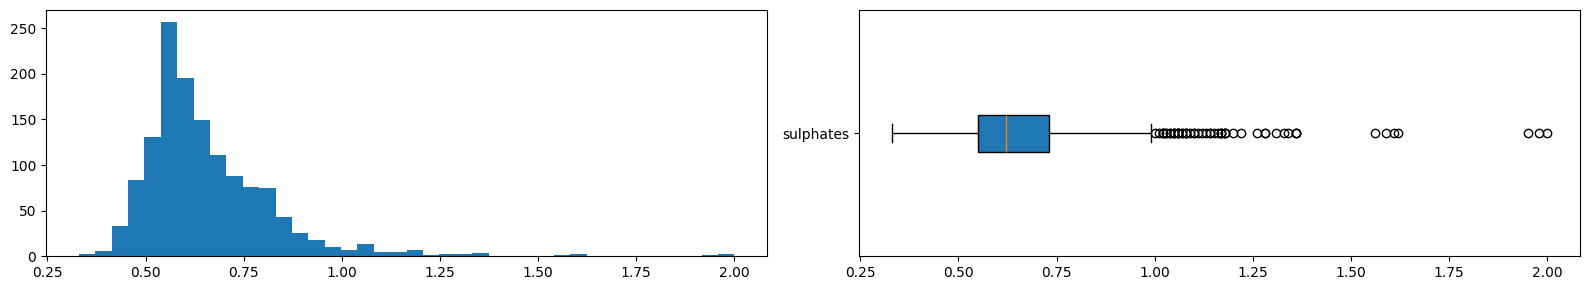

quatile_min: 0.28000000000000014, q25: 0.55, q50: 0.62, q75: 0.73, quatile_max: 0.9999999999999999
outliers: 55


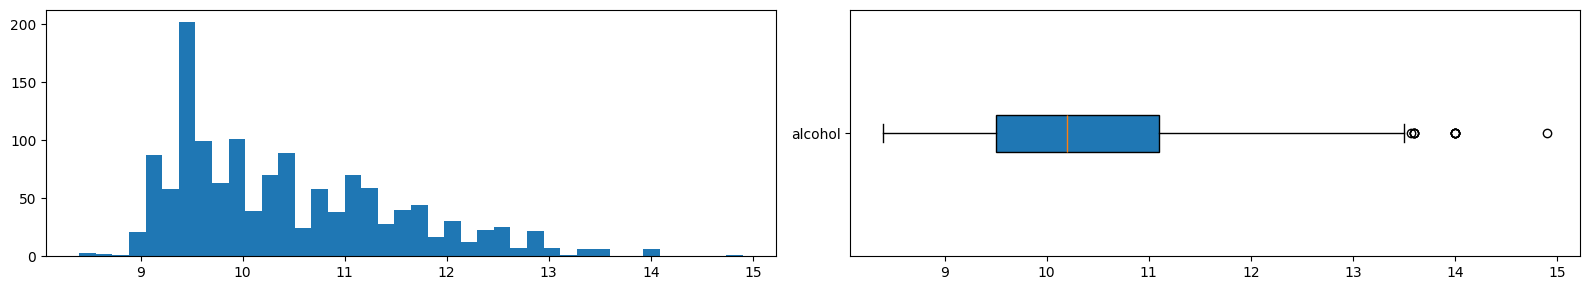

quatile_min: 7.1000000000000005, q25: 9.5, q50: 10.2, q75: 11.1, quatile_max: 13.5
outliers: 12


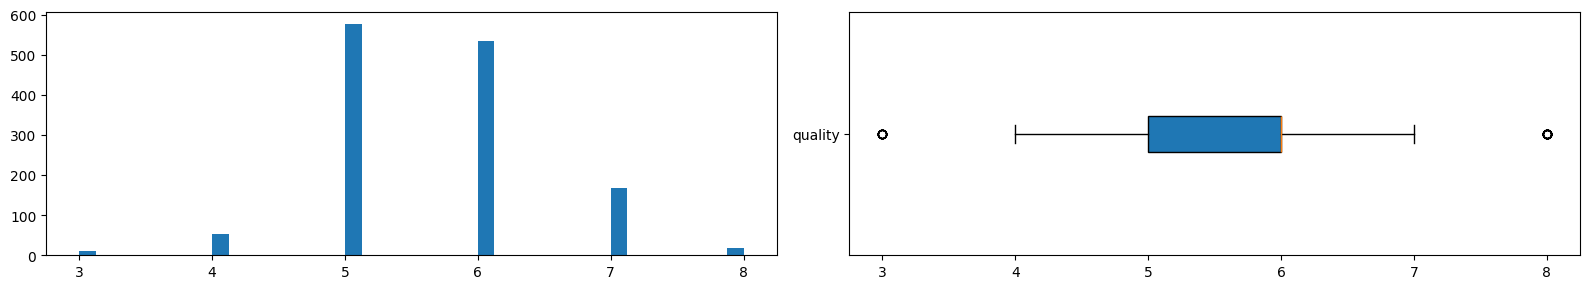

quatile_min: 3.5, q25: 5.0, q50: 6.0, q75: 6.0, quatile_max: 7.5
outliers: 27


In [ ]:
def find_outliers(col, ploting=True):
  if ploting:
    # plot histogram
    plt.figure(figsize=(16, 3))
    plt.subplot(121)
    plt.hist(col, bins=40)

    # boxplot
    plt.subplot(122)
    plt.boxplot(col, vert=False, patch_artist=True)
    plt.yticks([1], [col.name])

    plt.tight_layout()
    plt.show()

  # find outliers
  q25, q50, q75 = np.percentile(col, (25, 50, 75))
  iqr = q75 - q25
  max_, min_ = q75 + iqr * 1.5, q25 - iqr * 1.5

  if ploting:
    print(f'quatile_min: {min_}, q25: {q25}, q50: {q50}, q75: {q75}, quatile_max: {max_}')
  outliers = col.loc[(col > max_) | (col < min_)]
  if ploting:
    print(f'outliers: {len(outliers)}')
  return outliers

df_outliers = {}
for col in df.columns:
  df_outliers[col] = find_outliers(df[col])

As you can see, all most all of them have outliers and most of them do not follow normal distribution (except **density** feature).

Next, we check on the distribution of the target and outliers laied within them.

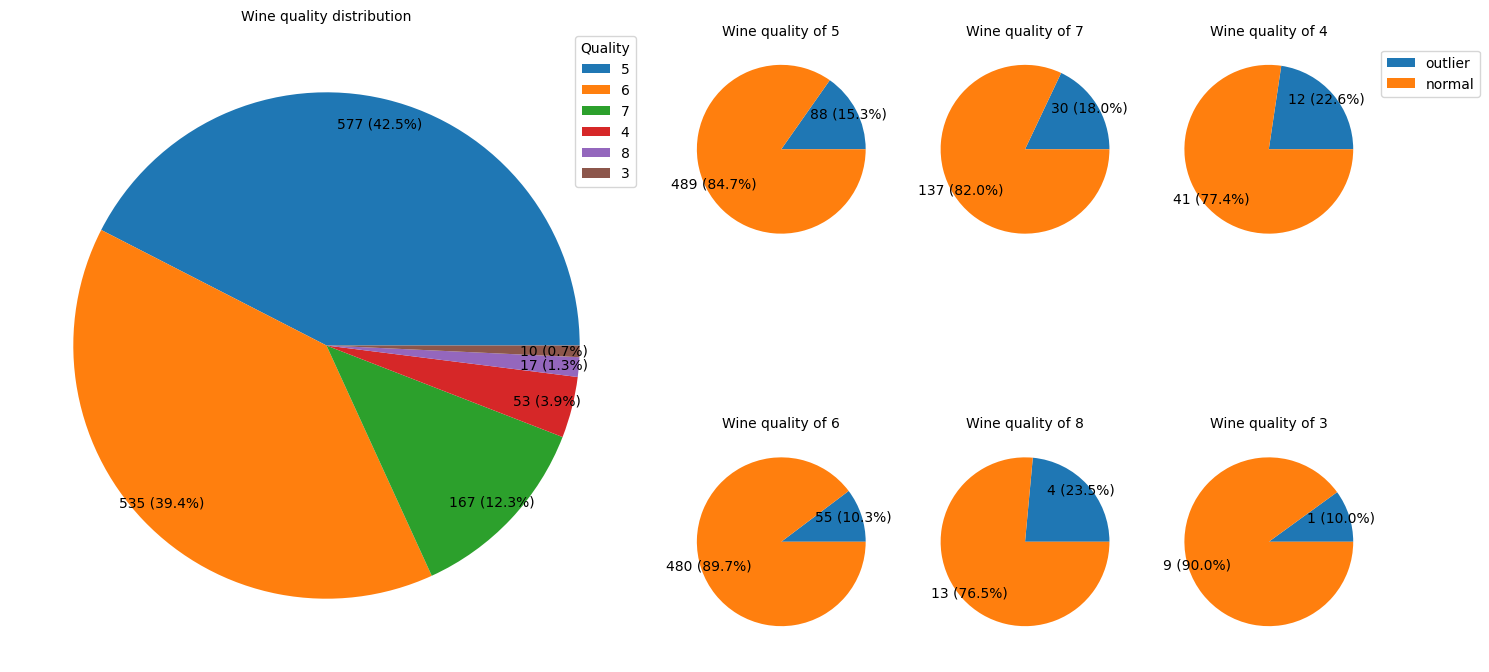

In [ ]:
from collections import defaultdict
import matplotlib.gridspec as gridspec

def get_outlier_classes(target='quality'):
  outlier_classes = defaultdict(lambda : 0)

  for row in df.itertuples(index=False):
    for i, col in enumerate(row._fields):
      if col == 'quality' or col == 'classification_quality': break
      if row[i] in df_outliers[col]:
          outlier_classes[row.quality if target == 'quality' else row.classification_quality] += 1
  return outlier_classes

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{count} ({pct:.1f}%)"
    return my_autopct

fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(2, 4, width_ratios=[3, 1, 1, 1], height_ratios=[1, 1])

count = df['quality'].value_counts()

ax = plt.subplot(gs[:, 0])
w, _, _ = ax.pie(count, autopct=make_autopct(count.values), pctdistance=0.9, textprops={'fontsize':10})
ax.set_title(f'Wine quality distribution', fontsize=10)
ax.legend(w, count.index, title='Quality', bbox_to_anchor=(1, 1))

r, c = 0, 1
for k, v in get_outlier_classes().items():
  t = [v, count[k] - v]

  ax = plt.subplot(gs[r, c])
  w, _, _ = ax.pie(t, autopct=make_autopct(t), pctdistance=0.9, textprops={'fontsize':10})
  ax.set_title(f'Wine quality of {k}', fontsize=10)
  if r == 0 and c == 3:
    ax.legend(w, ['outlier', 'normal'], bbox_to_anchor=(1, 1))

  c += 1
  if c > 3:
    r += 1
    c = 1

plt.tight_layout()
plt.show()

The classes are all imbalance with quality wine rank 3, 8, 4, 7 are the lowest.

Then within each class, we found that the outliers are never exceeded 25% of the class samples.

## Feature engineering the target

Because of imbalanced classes. The strategy will be combined classes into 3 bin:

bad (3,4,5,6)
good (7,8)

Note that, we had to keep the original target, for the reason we will explain below.

Then we check for target distribution again and their outliers.

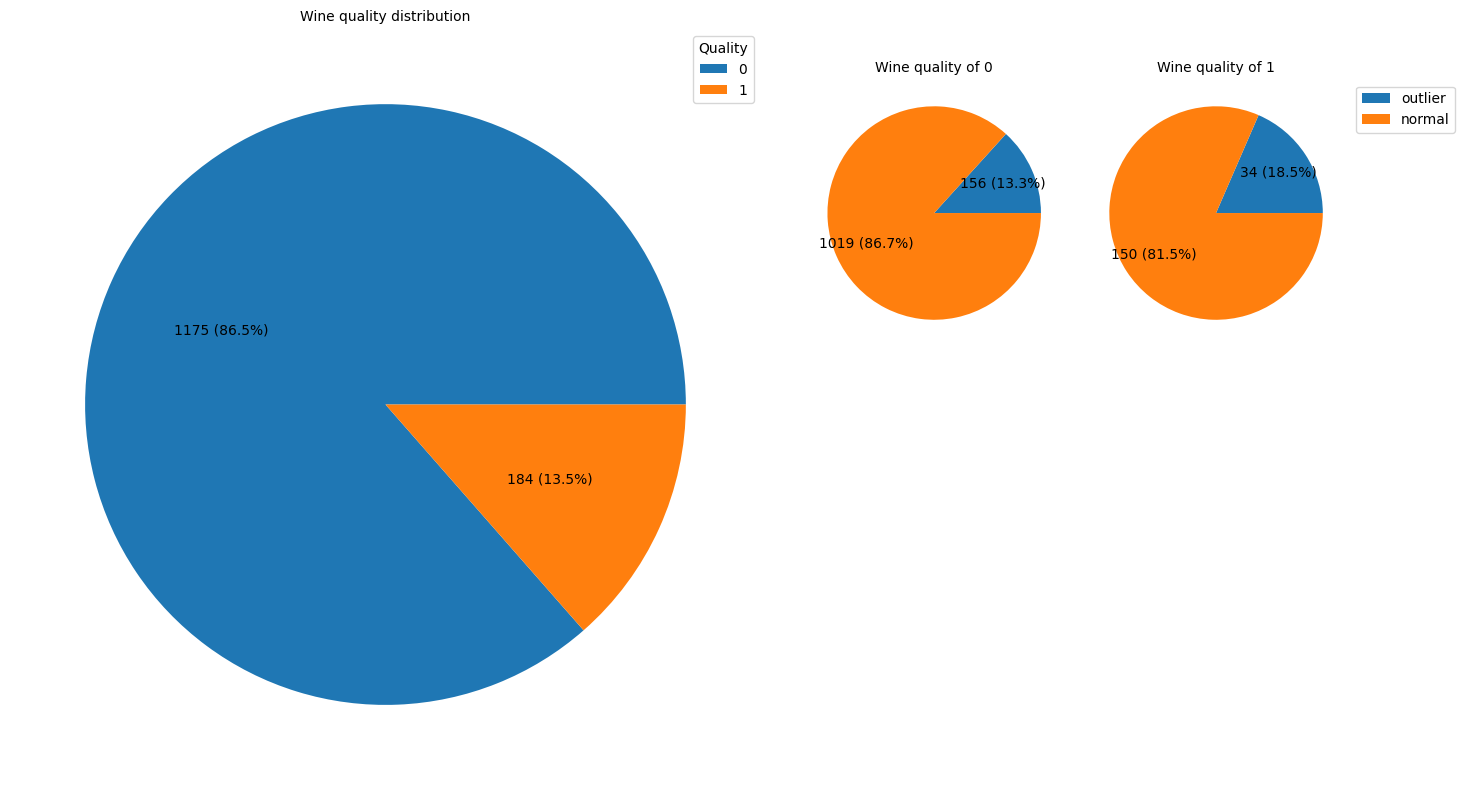

In [ ]:
df['classification_quality'] = df['quality'].apply(lambda x: 1 if x in (7, 8) else 0)

fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(2, 3, width_ratios=[3, 1, 1], height_ratios=[1, 1])

count = df['classification_quality'].value_counts()

ax = plt.subplot(gs[:, 0])
w, _, _ = ax.pie(count, autopct=make_autopct(count.values), pctdistance=0.6, textprops={'fontsize':10})
ax.set_title(f'Wine quality distribution', fontsize=10)
ax.legend(w, count.index, title='Quality', bbox_to_anchor=(1, 1))

r, c = 0, 1
for k, v in get_outlier_classes(target='classification').items():
  t = [v, count[k] - v]

  ax = plt.subplot(gs[r, c])
  w, _, _ = ax.pie(t, autopct=make_autopct(t), pctdistance=0.7, textprops={'fontsize':10})
  ax.set_title(f'Wine quality of {k}', fontsize=10)
  if r == 0 and c == 2:
    ax.legend(w, ['outlier', 'normal'], bbox_to_anchor=(1, 1))

  c += 1
  if c > 2:
    r += 1
    c = 1

plt.tight_layout()
plt.show()

We can see that the classes were now a bit less imbalance bescause of the good quality being the least.

And outliers within classes were still not exceed 25% of sample classes.

## Splitting data

We then proceeded to split the data into train and test with the ratio of 80:20.

The catch here was that we required to apply both classification and regresstion model for predicting. So we have to split data in 2 way.

One split for classification, other for regression.   

In [ ]:
from sklearn.model_selection import train_test_split

x, y = df.drop(columns=['quality', 'classification_quality']), df.loc[:, ['quality', 'classification_quality']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

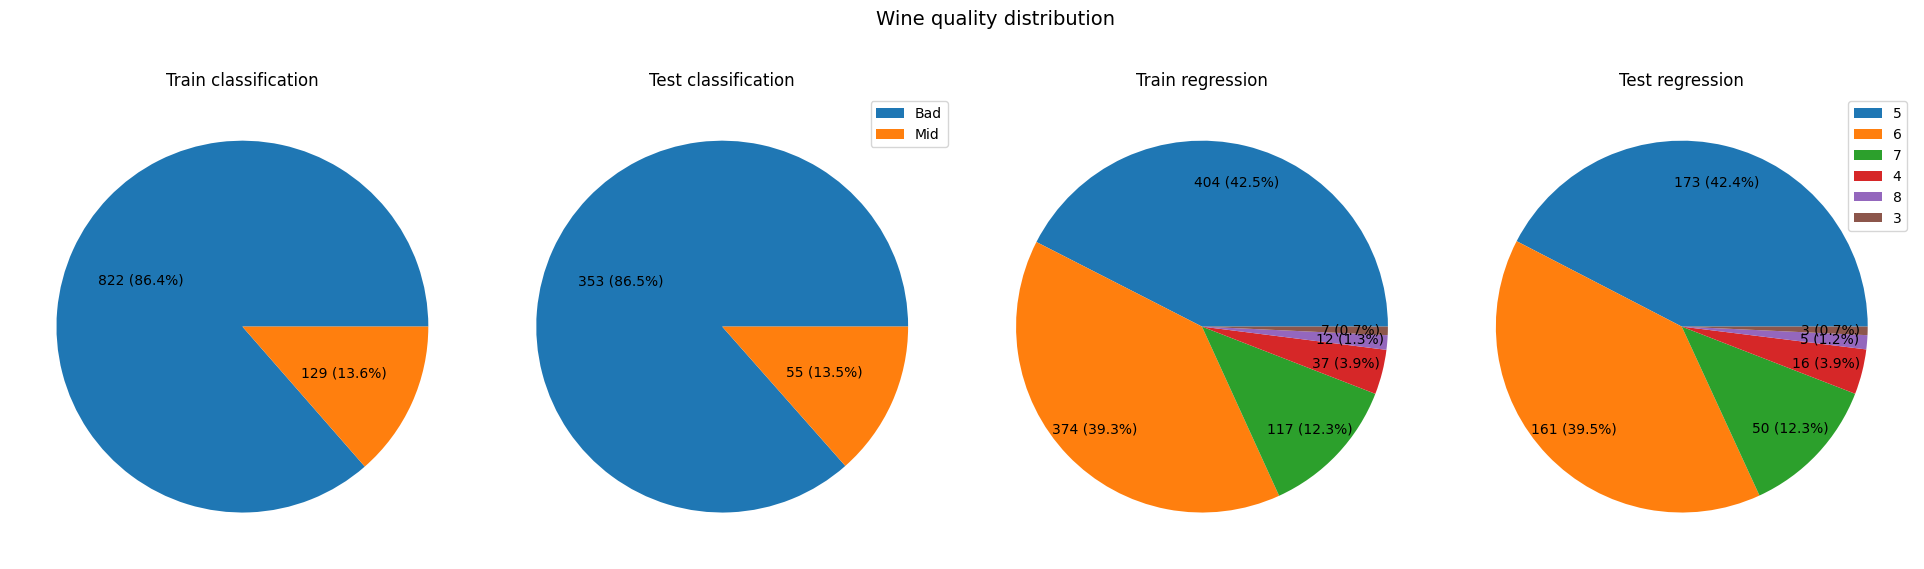

In [ ]:
c_train, c_test = y_train['classification_quality'].value_counts(), y_test['classification_quality'].value_counts()
c_train_r, c_test_r = y_train['quality'].value_counts(), y_test['quality'].value_counts()

fig, ax = plt.subplots(1, 4, figsize=(20, 15))

def make_autopct(values):
  def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{count} ({pct:.1f}%)'
  return my_autopct

ax[0].pie(c_train.values, autopct=make_autopct(c_train.values), pctdistance=0.6, textprops={'fontsize':10})
ax[0].set_title('Train classification')

w, _, _ = ax[1].pie(c_test.values, autopct=make_autopct(c_test.values), pctdistance=0.6, textprops={'fontsize':10})
ax[1].set_title('Test classification')
ax[1].legend(w, list(map(lambda x : 'Bad' if x == 0 else 'Mid' if x == 1 else 'Good', c_train.index)), bbox_to_anchor=(1, 1))

w, _, _ = ax[2].pie(c_train_r.values, autopct=make_autopct(c_train_r.values), pctdistance=0.8, textprops={'fontsize':10})
ax[2].set_title('Train regression')

w, _, _ = ax[3].pie(c_test_r.values, autopct=make_autopct(c_test_r.values), pctdistance=0.8, textprops={'fontsize':10})
ax[3].set_title('Test regression')
ax[3].legend(w, list(map(lambda x : x, c_test_r.index)), bbox_to_anchor=(1, 1))

fig.suptitle('Wine quality distribution', fontsize=14, y=0.7)
plt.tight_layout()
plt.show()

## Handle outliers

To handle outliers, we utilize iqr method to capped them to a threshold that within iqr range.

In [ ]:
from feature_engine.outliers import Winsorizer

features = [col for col in x.columns]
capper = Winsorizer(variables=features, capping_method='iqr', tail='both', fold=1.5)

x_train_temp = capper.fit_transform(x_train)
x_test_temp = capper.transform(x_test)

And these are features after getting capped.

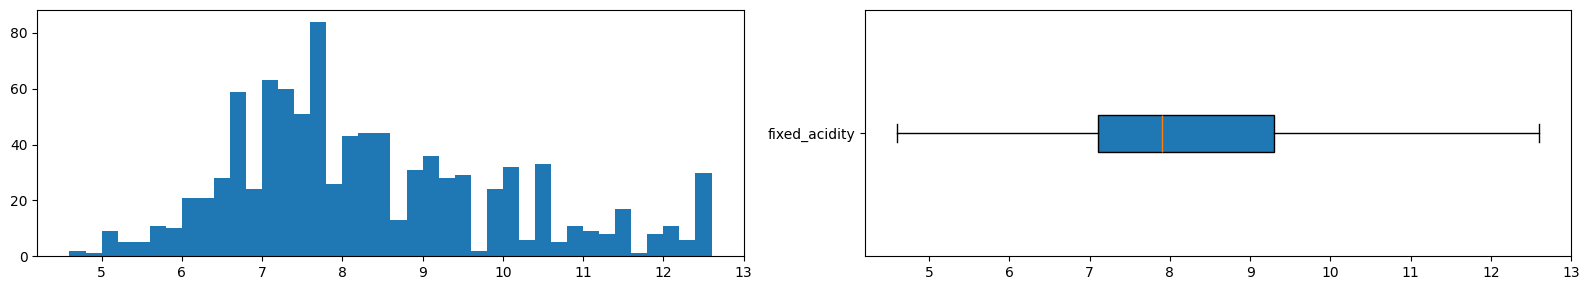

quatile_min: 3.799999999999998, q25: 7.1, q50: 7.9, q75: 9.3, quatile_max: 12.600000000000001
outliers: 0


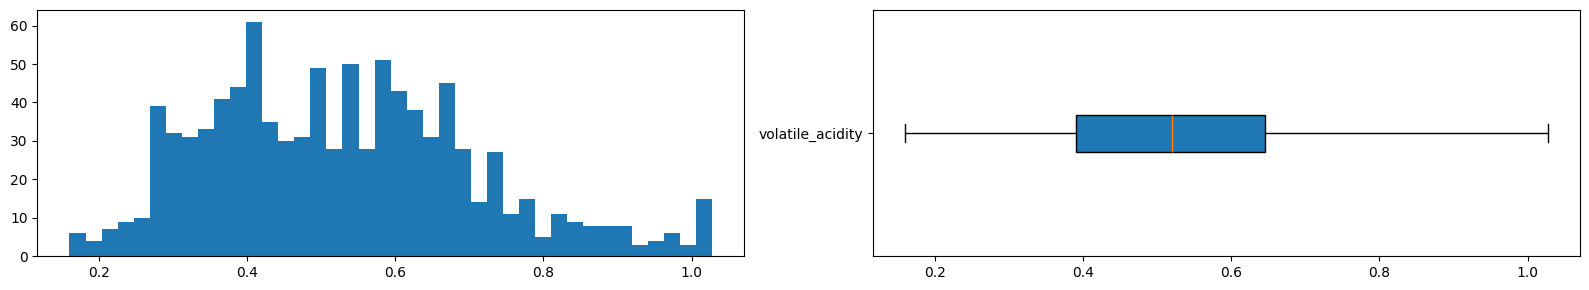

quatile_min: 0.007500000000000007, q25: 0.39, q50: 0.52, q75: 0.645, quatile_max: 1.0275
outliers: 0


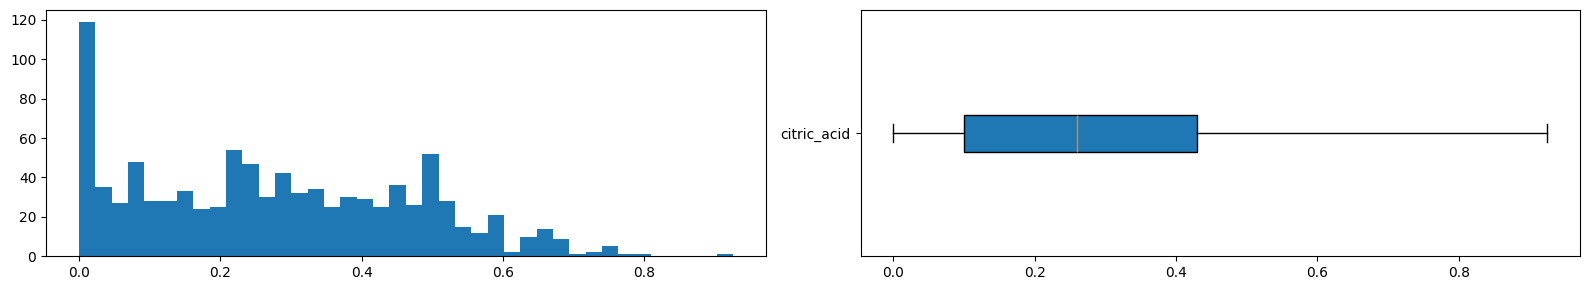

quatile_min: -0.3949999999999999, q25: 0.1, q50: 0.26, q75: 0.43, quatile_max: 0.9249999999999999
outliers: 0


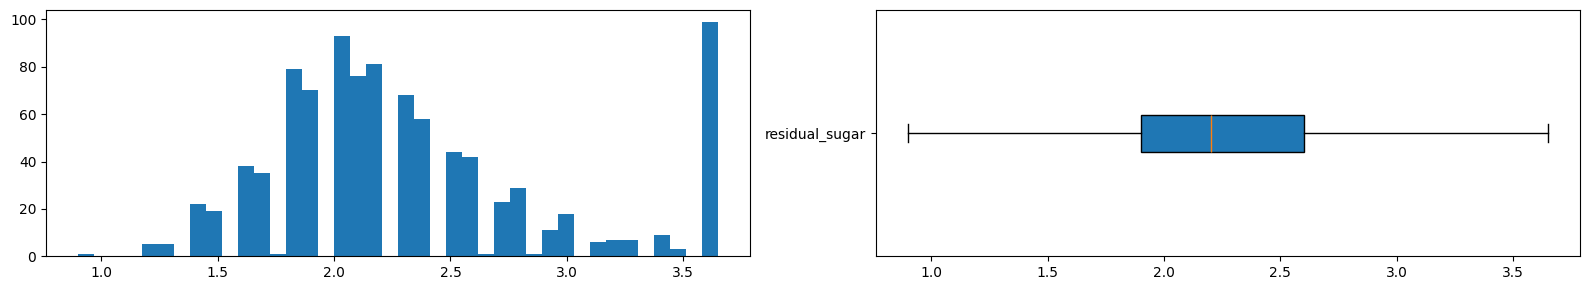

quatile_min: 0.8499999999999996, q25: 1.9, q50: 2.2, q75: 2.6, quatile_max: 3.6500000000000004
outliers: 0


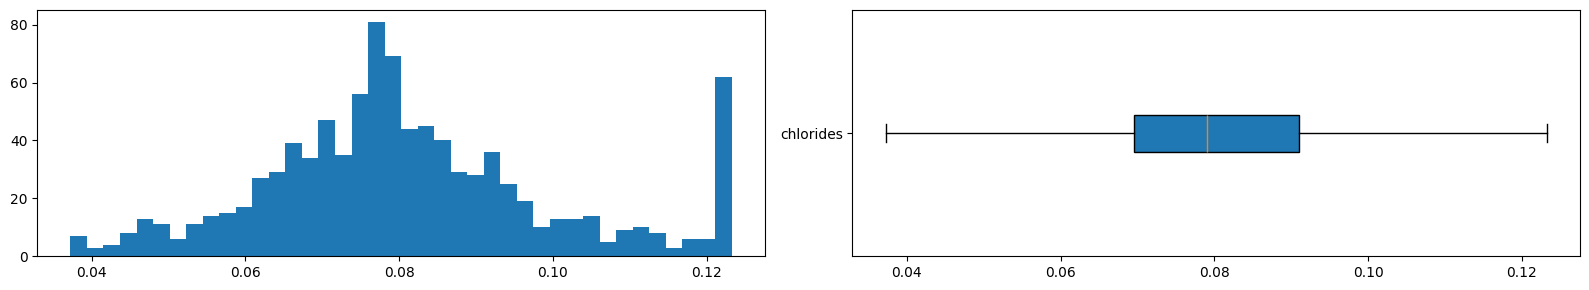

quatile_min: 0.03725000000000002, q25: 0.0695, q50: 0.079, q75: 0.091, quatile_max: 0.12324999999999998
outliers: 0


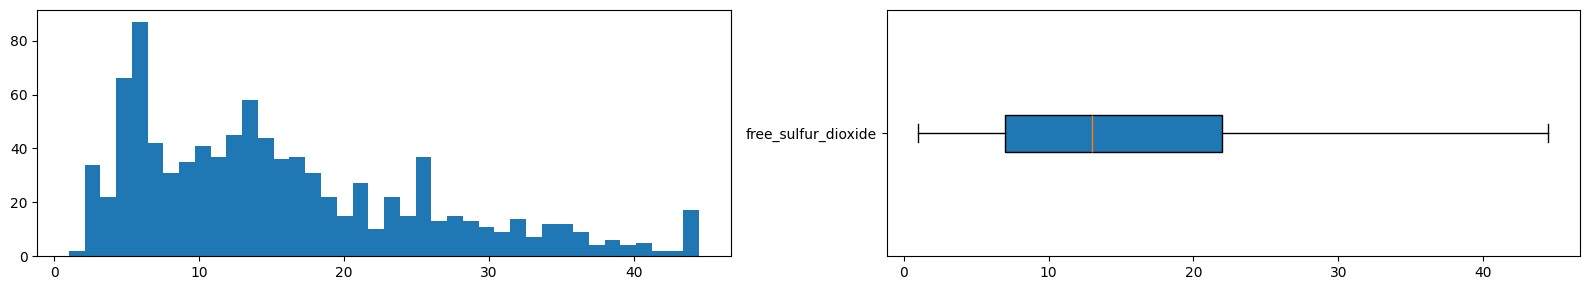

quatile_min: -15.5, q25: 7.0, q50: 13.0, q75: 22.0, quatile_max: 44.5
outliers: 0


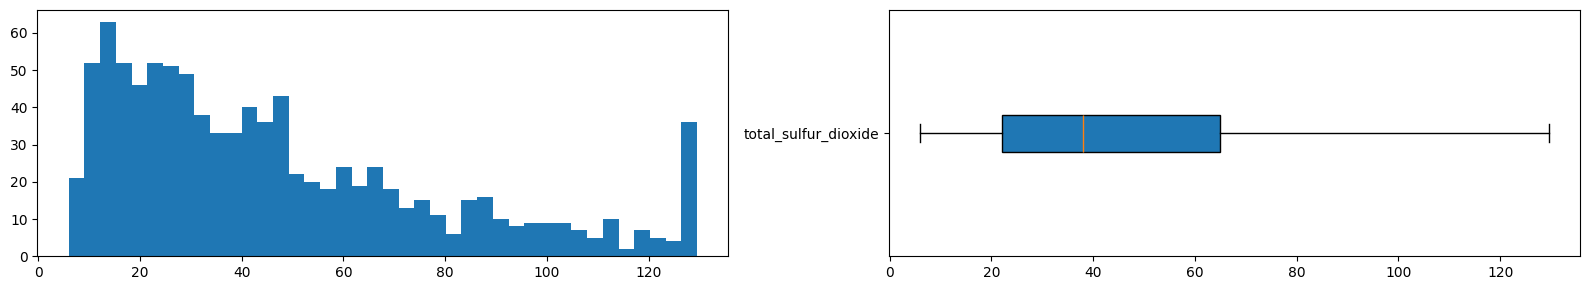

quatile_min: -42.5, q25: 22.0, q50: 38.0, q75: 65.0, quatile_max: 129.5
outliers: 0


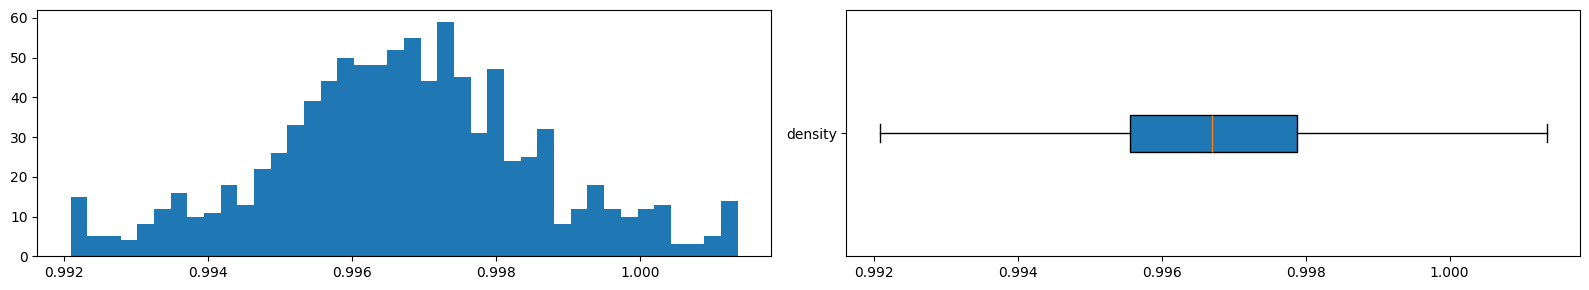

quatile_min: 0.9920874999999999, q25: 0.99556, q50: 0.9967, q75: 0.9978750000000001, quatile_max: 1.0013475
outliers: 0


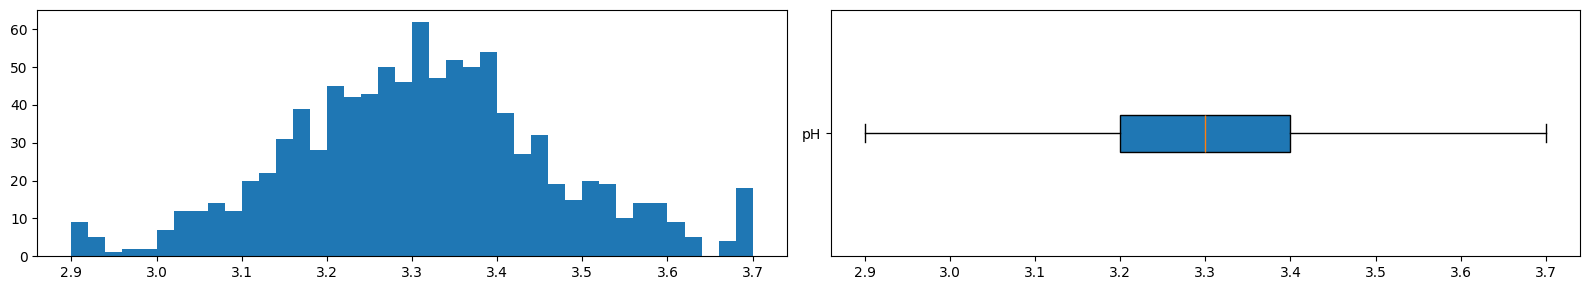

quatile_min: 2.9000000000000004, q25: 3.2, q50: 3.3, q75: 3.4, quatile_max: 3.6999999999999993
outliers: 0


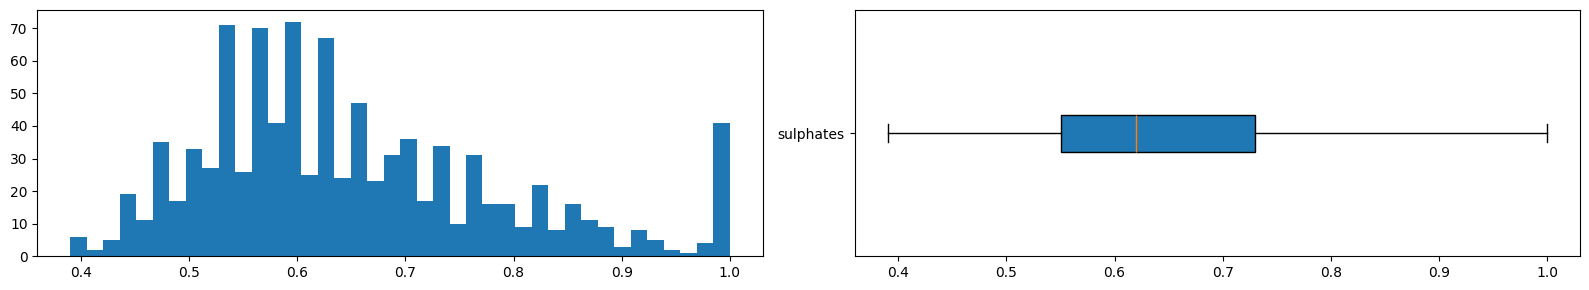

quatile_min: 0.28000000000000014, q25: 0.55, q50: 0.62, q75: 0.73, quatile_max: 0.9999999999999999
outliers: 0


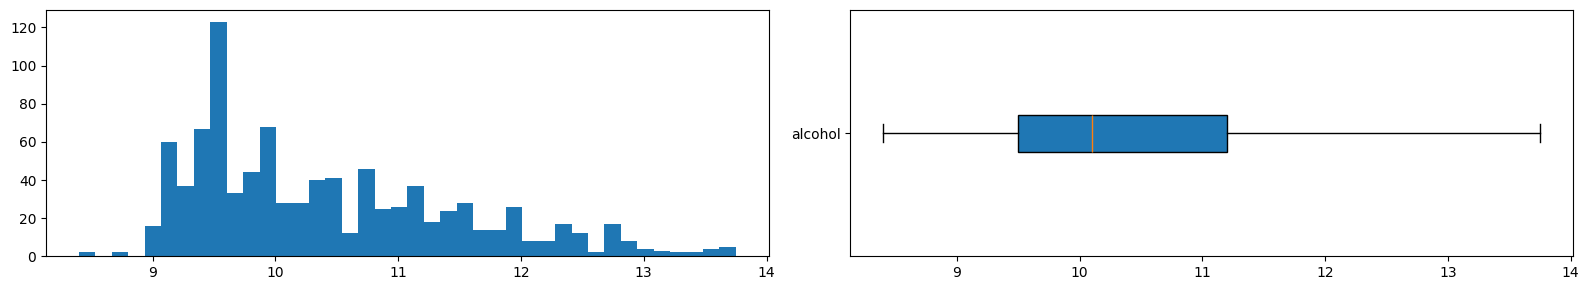

quatile_min: 6.950000000000001, q25: 9.5, q50: 10.1, q75: 11.2, quatile_max: 13.749999999999998
outliers: 0


In [ ]:
df_outliers = {}
for col in x.columns:
  find_outliers(x_train_temp[col])

## Scaling

Some models we used required the features to be scaled around 0 mean.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
std_x_train = sc.fit_transform(x_train_temp)
std_x_test = sc.transform(x_test_temp)

In [ ]:
std_x_train = pd.DataFrame(std_x_train, columns=x.columns)
std_x_test = pd.DataFrame(std_x_test, columns=x.columns)

## Visualize cluster

Here we utilize pca to detect any cluster of each classes.

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=2)
x_pca_temp = pca.fit_transform(std_x_train)

# Put into DataFrame for easier plotting
df_ = pd.DataFrame(x_pca_temp, columns=['pca1', 'pca2'])
df_["label"] = y_train['classification_quality']

df_pca = pd.DataFrame(x_pca_temp, columns=['pca1', 'pca2'])
df_pca['label'] = y_train['quality']


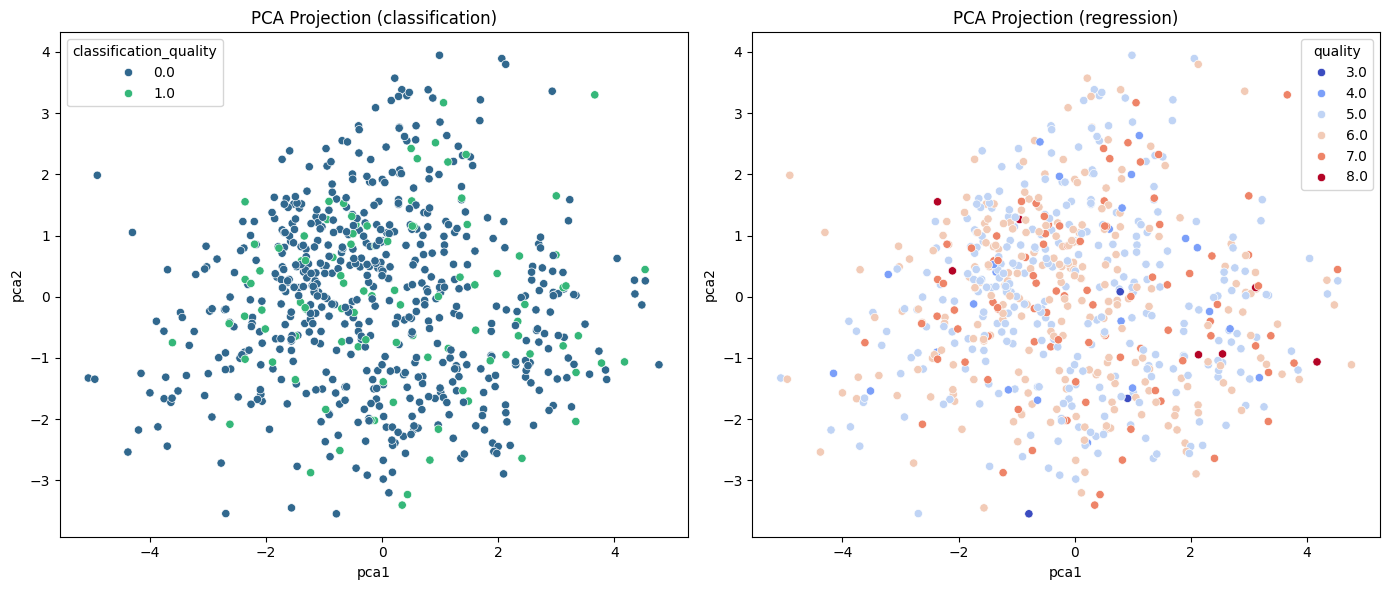

In [ ]:
# Set up the plotting area
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: df_
sns.scatterplot(data=df_, x='pca1', y='pca2', hue='label', ax=axes[0], palette='viridis')
axes[0].set_title('PCA Projection (classification)')
axes[0].legend(title='classification_quality')

# Second plot: df_pca
sns.scatterplot(data=df_pca, x='pca1', y='pca2', hue='label', ax=axes[1], palette='coolwarm')
axes[1].set_title('PCA Projection (regression)')
axes[1].legend(title='quality')

plt.tight_layout()
plt.show()


But here, all classes are intertwine, so that mean there are no relationship in term of clustering of each classes.

# Pick important feature

In [ ]:
!pip install imblearn

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet

## Over sampling

We then pursude to apply oversampling method in order to balance out the train set so that we can use rfecv to find the most important set of features that each model used.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# over_sample = RandomOverSampler(random_state=42, sampling_strategy='all')
x_over, y_over = smote.fit_resample(std_x_train, y_train['classification_quality'])
x_over_regress, y_over_regress = std_x_train, y_train['quality']

In [ ]:
def get_feature_important(x, y, estimator, param_grid):
  rfecv = RFECV(estimator=estimator, step=1, cv=5)

  gs = GridSearchCV(rfecv, param_grid, cv=5, n_jobs=-1)
  gs.fit(x, y)
  return gs

def print_result(gs):
  print('best params:', gs.best_params_)
  print('best score:', gs.best_score_)

### random forest classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=300, random_state=42)
param_grid = {'estimator__max_depth': [10, 20, 30]}

gs_rfc = get_feature_important(x_over, y_over, rfc, param_grid)

print_result(gs_rfc)

std_x_train_for_rfc = std_x_train.loc[:, gs_rfc.best_estimator_.support_]

best params: {'estimator__max_depth': 30}
best score: 0.9288216324412485


### logistic regressor

In [ ]:
lr = LogisticRegression(random_state=42)
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10],
    'estimator__solver': ['lbfgs', 'saga', 'newton-cg', 'sag'],
    'estimator__max_iter': [100, 200, 500]
}

gs_lr = get_feature_important(x_over, y_over, lr, param_grid)
std_x_train_for_lr = std_x_train.loc[:, gs_lr.best_estimator_.support_]

print_result(gs_lr)

best params: {'estimator__C': 0.1, 'estimator__max_iter': 100, 'estimator__solver': 'lbfgs'}
best score: 0.8083938764919564


### ranfom forest regressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=300, random_state=42)
param_grid = {'estimator__max_depth': [10, 20, 30]}
gs_rfr = get_feature_important(x_over_regress, y_over_regress, rfr, param_grid)

std_x_train_for_rfr = std_x_train.loc[:, gs_rfr.best_estimator_.support_]

print_result(gs_rfr)

best params: {'estimator__max_depth': 10}
best score: 0.3815314571244366


### linear regressor

In [ ]:
param_grid = {
    'estimator__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'estimator__max_iter':[1000, 5000, 10000]
    }

#### Ridge

In [ ]:
r = Ridge(random_state=42)
gs_r = get_feature_important(x_over_regress, y_over_regress, r, param_grid)

std_x_train_for_ridge = std_x_train.loc[:, gs_r.best_estimator_.support_]

print_result(gs_r)

best params: {'estimator__alpha': 100.0, 'estimator__max_iter': 1000}
best score: 0.3571352693600015


#### Lasso

In [ ]:
l = Lasso(random_state=42)
gs_l = get_feature_important(x_over_regress, y_over_regress, l, param_grid)

std_x_train_for_l = std_x_train.loc[:, gs_l.best_estimator_.support_]

print_result(gs_l)

best params: {'estimator__alpha': 0.01, 'estimator__max_iter': 1000}
best score: 0.36036516595340384


### Summary

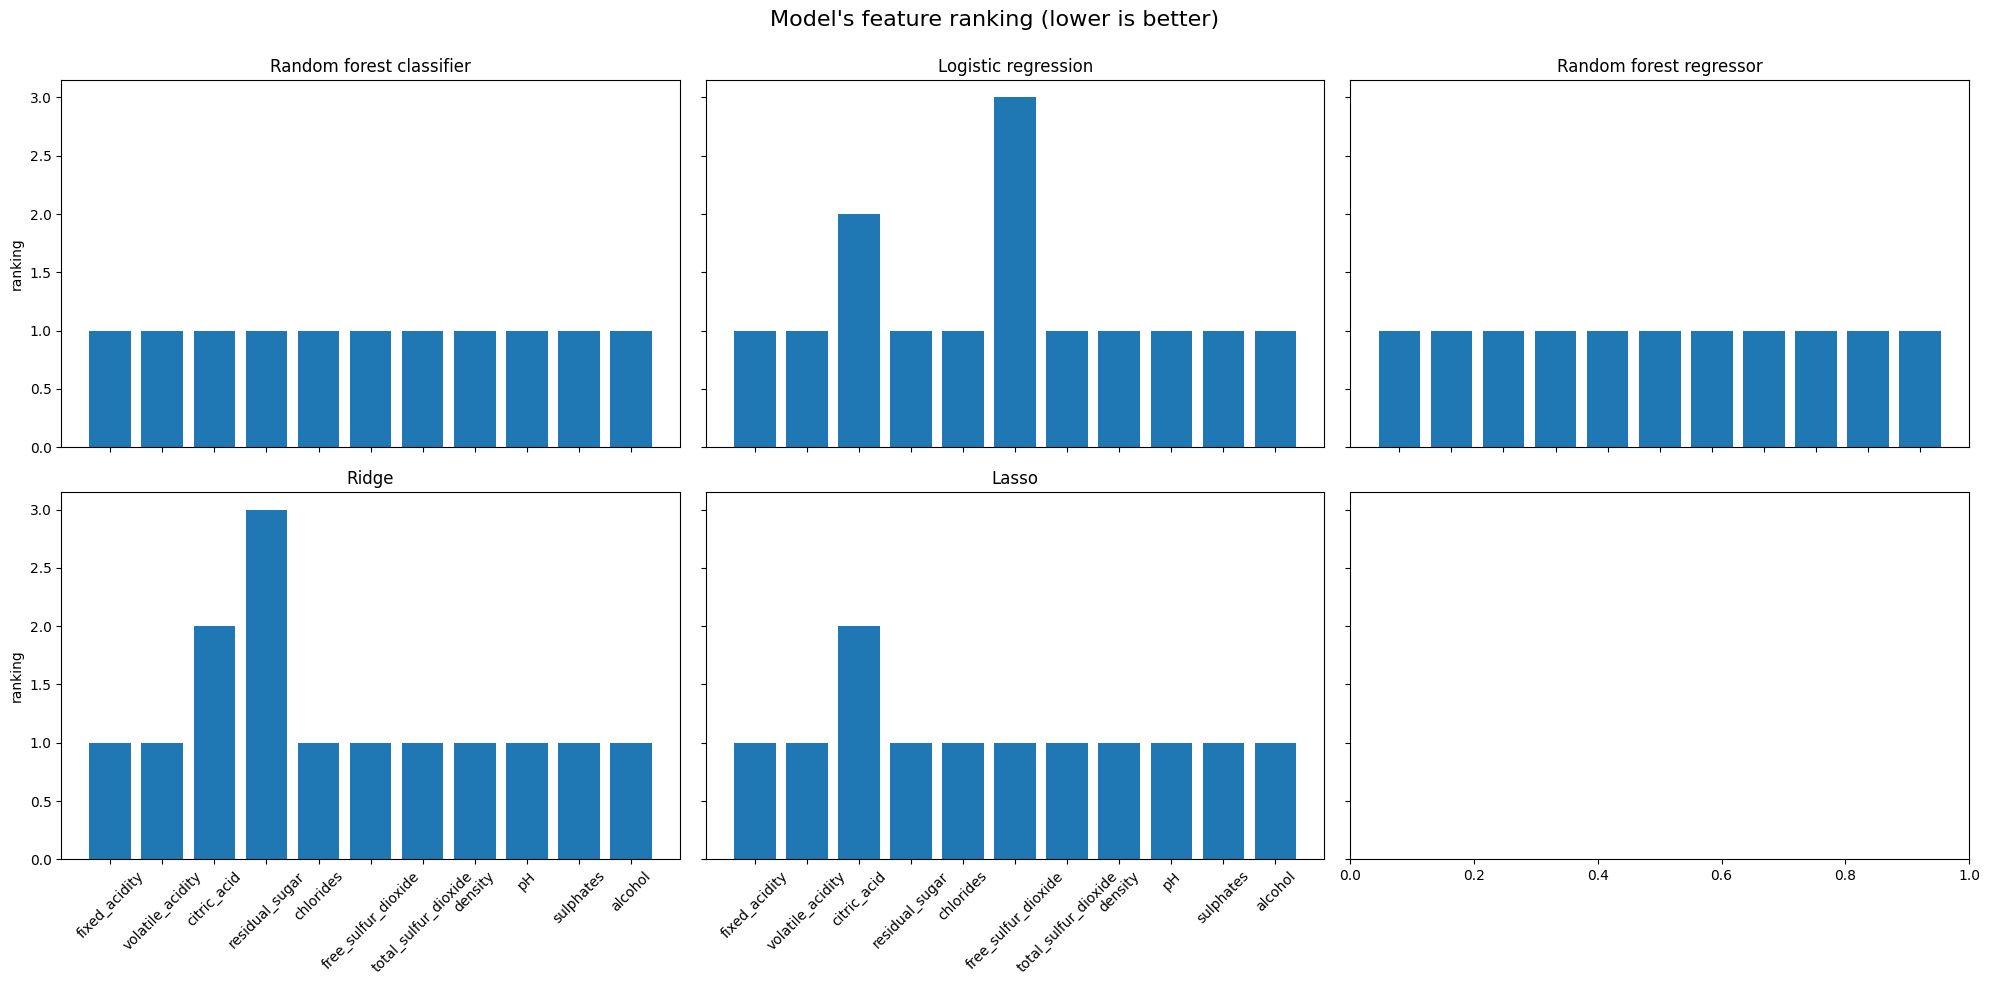

In [ ]:
fig, ax = plt.subplots(2, 3, sharey=True, figsize=(20, 10))

def plot(r, c, ranking, title):
  t = list(range(len(std_x_train.columns)))
  ax[r][c].bar(t, ranking.tolist())
  ax[r][c].set_xticks(t)
  ax[r][c].set_xticklabels(std_x_train.columns, rotation=45)
  ax[r][c].set_title(title)
  ax[r][c].tick_params(labelbottom=False, labelleft=False)

  if c == 0:
    ax[r][c].tick_params(labelleft=True)
    ax[r][c].set_ylabel('ranking')
  if r == 1:
    ax[r][c].tick_params(labelbottom=True)

gs = [
    (gs_rfc, 'Random forest classifier'),
     (gs_lr, 'Logistic regression'),
      (gs_rfr, 'Random forest regressor'),
      (gs_r, 'Ridge'),
      (gs_l, 'Lasso')
    ]

i = 0
for r in range(2):
  for c in range(3):
    if i == 5: break
    plot(r, c, gs[i][0].best_estimator_.ranking_, gs[i][1])
    i += 1

plt.suptitle("Model's feature ranking (lower is better)", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.91)
plt.show()

Here are the result aftermath, with the most important model's features having the lowest number in ranking.

std_x_train_for_r cho random forest ridge

std_x_train_for_l cho random forest lasso

std_x_train_for_en cho random forest elastic net

std_x_train_for_rfr cho random forest regressor

std_x_train_for_rfc cho random forest classifier

std_x_train_for_lr cho logistic regressor

y_train['quality'] sẽ là target cho model regression

y_train['classification_quality'] sẽ là target cho model classification

std_x_test sử dụng cho test

y_test['quality'] sẽ là target cho model regression

y_test['classification_quality'] sẽ là target cho model classification

# **Modeling**

## Importing Necessary Libraries

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

from sklearn.metrics import accuracy_score # Accuracy measurementss

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils import compute_sample_weight
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                           classification_report, confusion_matrix, roc_auc_score, roc_curve)

In [ ]:

# sample_weights = compute_sample_weight(class_weight='balanced', y=wine['quality'])
# model.fit(X_train, y_train, sample_weight=sample_weights)


## **Regression tasks**

### Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(std_x_train, y_train['quality'])

y_pred_lr = lr_model.predict(std_x_test)

mse_lr = mean_squared_error(y_test['quality'], y_pred_lr)
rmse_lr = np.sqrt(mse_lr)


print("Linear Regression:")
print(f"MSE: {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")

coef_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': lr_model.coef_})
print("\nHệ số đặc trưng:\n", coef_df)

Linear Regression:
MSE: 0.4319
RMSE: 0.6572

Hệ số đặc trưng:
                  Feature  Coefficient
0          fixed_acidity     0.052769
1       volatile_acidity    -0.178602
2            citric_acid    -0.033983
3         residual_sugar    -0.011406
4              chlorides    -0.060545
5    free_sulfur_dioxide     0.033646
6   total_sulfur_dioxide    -0.073506
7                density    -0.026267
8                     pH    -0.062503
9              sulphates     0.173652
10               alcohol     0.307821


*Linear Regression with (cross_val_score)*

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model, std_x_train, y_train['quality'], cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-validated RMSE: {-scores.mean():.4f} ± {scores.std():.4f}")

Cross-validated RMSE: 0.6605 ± 0.0384


**Optimize linear regression model with feature selection dataset , Lasso and gridsearch cv**

In [ ]:
std_x_train_for_l.columns

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
std_x_test_for_l = std_x_test[std_x_train_for_l.columns]
std_x_test_for_l

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.586253,0.332439,-0.526593,-0.064006,0.116732,1.764559,-0.459941,-0.170115,-0.939096,-0.486840
1,-0.414018,-0.273554,0.776487,-0.592844,-1.162668,-0.991417,0.122699,-0.557612,-0.721696,-0.118844
2,0.791632,-0.604096,-0.363708,-0.381309,-1.064253,-0.960451,-0.112495,-0.234698,0.655173,1.721135
3,1.136104,0.332439,0.776487,0.464833,1.888210,0.804612,1.229180,-0.170115,0.365306,-0.854836
4,-1.217784,0.607890,0.287832,-0.011122,-0.080098,-0.650791,-0.705825,1.702784,-0.141962,1.445139
...,...,...,...,...,...,...,...,...,...,...
403,2.456577,-0.824457,0.450717,0.359065,-0.572175,-0.186301,2.298244,-0.880526,0.220372,-0.578839
404,-0.414018,-0.604096,0.613602,0.147530,-0.080098,0.030461,0.053210,-0.622195,-0.431829,-0.394841
405,0.963868,-0.659186,2.161009,-0.539960,-0.965837,-1.022383,0.170807,-0.622195,-1.156497,1.261141
406,-0.988137,-0.769367,-1.015248,-0.592844,0.707225,2.554192,-2.405637,-1.203439,-1.084030,0.985144


*Gridsearch cv and print Cross validation for feature selection dataset and Lasso*

In [ ]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lasso, params, cv=5,scoring='neg_root_mean_squared_error')
grid.fit(std_x_train_for_l, y_train['quality'])

print("Best alpha:", grid.best_params_)
print("Best score:", abs(grid.best_score_))

Best alpha: {'alpha': 0.01}
Best score: 0.6577094209902663


In [ ]:
lasso_model = Lasso(**grid.best_params_, random_state=42)
lasso_model.fit(std_x_train_for_l, y_train['quality'])

y_pred_lasso = lasso_model.predict(std_x_test_for_l)

mse_lasso = mean_squared_error(y_test['quality'], y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Lasso:")
print(f"MSE: {mse_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.4f}")

coef_df = pd.DataFrame({'Feature': std_x_train_for_l.columns, 'Coefficient': lasso_model.coef_})
print("\nHệ số đặc trưng:\n", coef_df)

Lasso:
MSE: 0.4354
RMSE: 0.6598

Hệ số đặc trưng:
                 Feature  Coefficient
0         fixed_acidity     0.008850
1      volatile_acidity    -0.169536
2        residual_sugar    -0.010849
3             chlorides    -0.055666
4   free_sulfur_dioxide     0.006595
5  total_sulfur_dioxide    -0.054043
6               density    -0.000000
7                    pH    -0.053687
8             sulphates     0.164026
9               alcohol     0.309602


**Optimize linear regression model with feature selection dataset , Ridge and gridsearch cv**

In [ ]:

std_x_train_for_ridge.columns

Index(['fixed_acidity', 'volatile_acidity', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
std_x_test_for_ridge = std_x_test[std_x_train_for_ridge.columns]
std_x_test_for_ridge

,fixed_acidity,volatile_acidity,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.586253,0.332439,-0.064006,0.116732,1.764559,-0.459941,-0.170115,-0.939096,-0.486840
1,-0.414018,-0.273554,-0.592844,-1.162668,-0.991417,0.122699,-0.557612,-0.721696,-0.118844
2,0.791632,-0.604096,-0.381309,-1.064253,-0.960451,-0.112495,-0.234698,0.655173,1.721135
3,1.136104,0.332439,0.464833,1.888210,0.804612,1.229180,-0.170115,0.365306,-0.854836
4,-1.217784,0.607890,-0.011122,-0.080098,-0.650791,-0.705825,1.702784,-0.141962,1.445139
...,...,...,...,...,...,...,...,...,...
403,2.456577,-0.824457,0.359065,-0.572175,-0.186301,2.298244,-0.880526,0.220372,-0.578839
404,-0.414018,-0.604096,0.147530,-0.080098,0.030461,0.053210,-0.622195,-0.431829,-0.394841
405,0.963868,-0.659186,-0.539960,-0.965837,-1.022383,0.170807,-0.622195,-1.156497,1.261141
406,-0.988137,-0.769367,-0.592844,0.707225,2.554192,-2.405637,-1.203439,-1.084030,0.985144


*Gridsearch cv and Cross validation for feature selection dataset and Ridge*

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
grid = GridSearchCV(ridge, params, cv=5,scoring='neg_root_mean_squared_error')
grid.fit(std_x_train_for_ridge, y_train['quality'])

print("Best alpha:", grid.best_params_)
print("Best score:", abs(grid.best_score_))

Best alpha: {'alpha': 100.0}
Best score: 0.6566070558652405


In [ ]:
r_model = Ridge(**grid.best_params_, random_state=42)
r_model.fit(std_x_train_for_ridge, y_train['quality'])

y_pred_r = r_model.predict(std_x_test_for_ridge)

mse_r = mean_squared_error(y_test['quality'], y_pred_r)
rmse_r = np.sqrt(mse_r)

print("Ridge:")
print(f"MSE: {mse_r:.4f}")
print(f"RMSE: {rmse_r:.4f}")

coef_df = pd.DataFrame({'Feature': std_x_train_for_ridge.columns, 'Coefficient': r_model.coef_})
print("\nHệ số đặc trưng:\n", coef_df)

Ridge:
MSE: 0.4359
RMSE: 0.6602

Hệ số đặc trưng:
                 Feature  Coefficient
0         fixed_acidity     0.060119
1      volatile_acidity    -0.159092
2             chlorides    -0.060543
3   free_sulfur_dioxide     0.026611
4  total_sulfur_dioxide    -0.071851
5               density    -0.058973
6                    pH    -0.039776
7             sulphates     0.166021
8               alcohol     0.260157


### Random Forest Regressor


Random Forest Regression:
MSE: 0.4084
RMSE: 0.6391

Độ quan trọng của đặc trưng:
                  Feature  Importance
10               alcohol    0.265314
1       volatile_acidity    0.148254
9              sulphates    0.142265
6   total_sulfur_dioxide    0.071435
8                     pH    0.065616
4              chlorides    0.060719
7                density    0.053487
2            citric_acid    0.049600
5    free_sulfur_dioxide    0.049508
3         residual_sugar    0.048813
0          fixed_acidity    0.044989


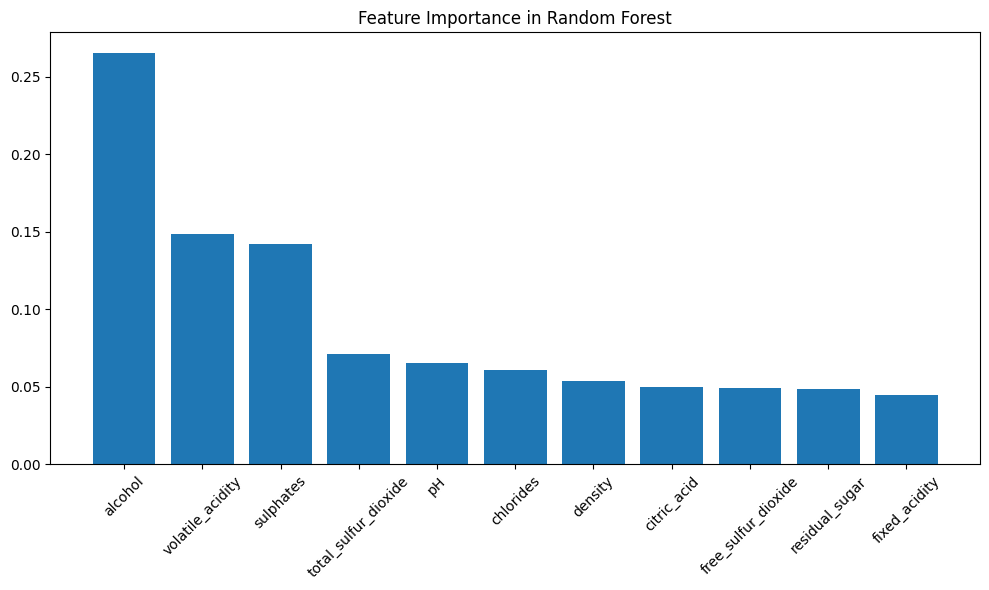

In [ ]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(std_x_train, y_train['quality'])

y_pred_rf = rf_model.predict(std_x_test)

mse_rf = mean_squared_error(y_test['quality'], y_pred_rf)
rmse_rf = np.sqrt(mse_rf)


print("\nRandom Forest Regression:")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")

feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nĐộ quan trọng của đặc trưng:\n", feature_importance)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=45)
plt.title('Feature Importance in Random Forest')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, std_x_train, y_train['quality'], cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-validated RMSE: {-scores.mean():.4f} ± {scores.std():.4f}")

Cross-validated RMSE: 0.6459 ± 0.0238


**Optimize Random Forest Regressor pipeline with GridsearchCV**

In [ ]:
len(std_x_train_for_rfr.columns)

11

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None,5, 10, 20],
    'min_samples_split': [2, 5, 10,15],
    "max_features":['sqrt', 'log2']
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5,scoring='neg_root_mean_squared_error')
grid_search.fit(std_x_train_for_rfr, y_train['quality'])
print("Best params:", grid_search.best_params_)
print("Best score:", abs(grid_search.best_score_))

Best params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.6353988201222895



Random Forest Regression:
MSE: 0.3997
RMSE: 0.6322

Độ quan trọng của đặc trưng:
                  Feature  Importance
10               alcohol    0.194784
9              sulphates    0.146045
1       volatile_acidity    0.134279
7                density    0.086217
6   total_sulfur_dioxide    0.075531
2            citric_acid    0.074474
4              chlorides    0.065355
0          fixed_acidity    0.060991
8                     pH    0.060825
5    free_sulfur_dioxide    0.051664
3         residual_sugar    0.049836


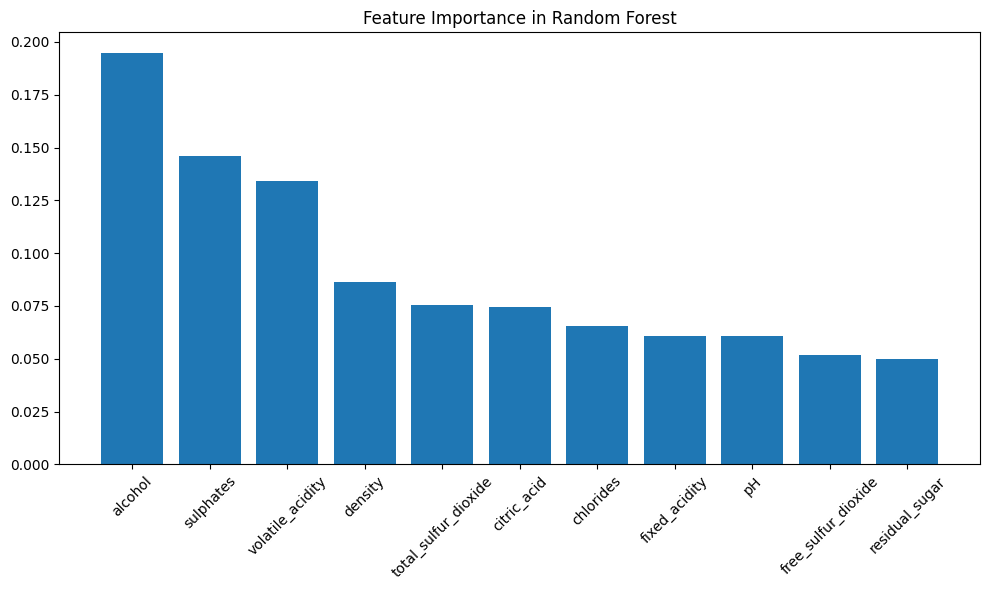

In [ ]:
rf_model = RandomForestRegressor(n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42,max_features = "sqrt")
rf_model.fit(std_x_train_for_rfr, y_train['quality'])

y_pred_rf = rf_model.predict(std_x_test)

mse_rf = mean_squared_error(y_test['quality'], y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("\nRandom Forest Regression:")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")

feature_importance = pd.DataFrame({'Feature': std_x_train_for_rfr.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nĐộ quan trọng của đặc trưng:\n", feature_importance)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=45)
plt.title('Feature Importance in Random Forest')
plt.tight_layout()
plt.show()

### Compare 2 best rmse score regression models


So sánh hai mô hình:
Model                     MSE        RMSE       
Linear                    0.4319 0.6572 
Random Forest             0.3997 0.6322


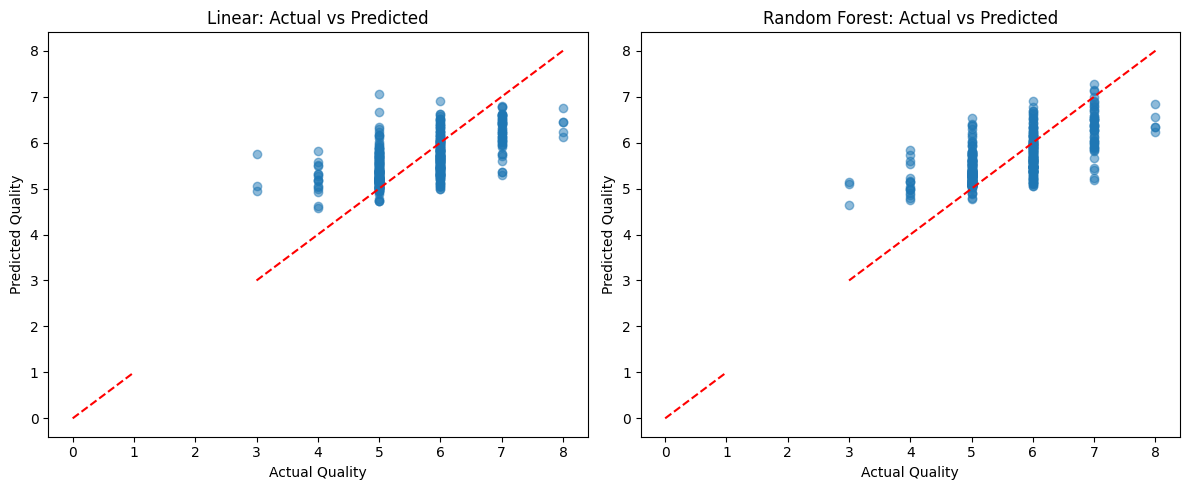

In [ ]:

print("\nSo sánh hai mô hình:")
print(f"{'Model':<25} {'MSE':<10} {'RMSE':<10} ")
print(f"{'Linear':<25} {mse_lr:.4f} {rmse_lr:.4f} ")
print(f"{'Random Forest':<25} {mse_rf:.4f} {rmse_rf:.4f}")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test['quality'], y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear: Actual vs Predicted')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')

plt.subplot(1, 2, 2)
plt.scatter(y_test['quality'], y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')

plt.tight_layout()
plt.show()

## **Classification tasks**

### Random Forest Classifier

**Baseline RANDOM FOREST CLASSIFIER**

In [ ]:
rf_baseline = RandomForestClassifier(random_state=42, n_jobs=-1)

# Huấn luyện trên dữ liệu gốc (chưa xử lý)
rf_baseline.fit(std_x_train, y_train['classification_quality'])

# Dự đoán
y_pred_baseline = rf_baseline.predict(std_x_test)

print("BASELINE PERFORMANCE:")
print(f"Accuracy: {accuracy_score(y_test['classification_quality'], y_pred_baseline):.4f}")
print(f"F1-score: {f1_score(y_test['classification_quality'], y_pred_baseline):.4f}")
print(f"Precision: {precision_score(y_test['classification_quality'], y_pred_baseline):.4f}")
print(f"Recall: {recall_score(y_test['classification_quality'], y_pred_baseline):.4f}")
print("\nClassification Report:")
print(classification_report(y_test['classification_quality'], y_pred_baseline))


BASELINE PERFORMANCE:
Accuracy: 0.8848
F1-score: 0.4719
Precision: 0.6176
Recall: 0.3818

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       353
           1       0.62      0.38      0.47        55

    accuracy                           0.88       408
   macro avg       0.76      0.67      0.70       408
weighted avg       0.87      0.88      0.87       408



*Confusion Matrix cho baseline RANDOM FOREST CLASSIFIER*

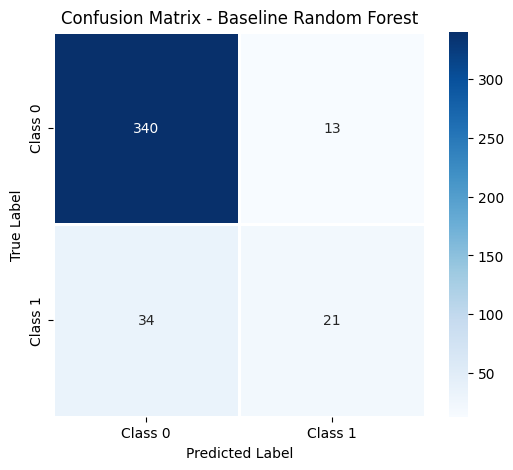

In [ ]:
cm_baseline = confusion_matrix(y_test['classification_quality'], y_pred_baseline)
df_baseline = pd.DataFrame(columns=["Class 0", "Class 1"],
                          index=["Class 0", "Class 1"],
                          data=cm_baseline)
plt.figure(figsize=(6, 5))
sns.heatmap(df_baseline, annot=True, cmap="Blues", fmt='.0f',
           linewidths=2, cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Baseline Random Forest")
plt.show()

**GRIDSEARCH WITH FEATURE SELECTION AND OVERSAMPLING DATA OPTIMIZATION FOR RANDOM FOREST CLASSIFIER**

In [ ]:
std_x_train_for_rfc_over = x_over[std_x_train_for_rfc.columns]
std_x_train_for_rfc_over

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-1.102960,0.552800,-0.337210,-1.178133,-0.064006,-0.375345,-0.464995,0.101318,1.767367,0.075439,-0.578839
1,-0.815901,0.580345,-0.541779,0.124947,2.223221,-0.965837,-0.898519,-0.320962,0.604878,-0.431829,-0.118844
2,-0.299194,0.112078,0.378780,-0.200823,-0.381309,0.510394,0.587850,0.373929,-0.363864,-0.649229,-1.130833
3,-0.873313,1.406699,-1.411197,0.124947,1.205207,-0.178514,-0.526927,-0.053696,1.379870,-0.721696,0.249152
4,1.078692,-0.934638,1.861904,0.939372,2.157116,-0.572175,-0.186301,0.694648,-0.493029,0.075439,1.905133
...,...,...,...,...,...,...,...,...,...,...,...
1639,1.842865,0.039890,2.140537,2.161009,2.186291,-0.965837,-1.001028,0.808922,-1.833673,1.104955,1.175482
1640,0.557269,-0.373867,0.565408,0.702338,-0.539568,-0.527375,-0.715726,-0.184936,-0.141195,0.015952,0.876666
1641,0.463840,-1.536150,0.340118,-0.511450,-0.533815,2.812292,0.618816,0.544535,0.854203,1.529827,-0.204429
1642,0.988824,-0.525844,1.124412,0.566400,-0.184344,-0.509409,-0.865310,-0.196242,-0.535139,-0.094712,1.043817


In [ ]:
std_x_test_for_rfc = std_x_test[std_x_train_for_rfc.columns]
std_x_test_for_rfc

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.586253,0.332439,-0.081499,-0.526593,-0.064006,0.116732,1.764559,-0.459941,-0.170115,-0.939096,-0.486840
1,-0.414018,-0.273554,0.174212,0.776487,-0.592844,-1.162668,-0.991417,0.122699,-0.557612,-0.721696,-0.118844
2,0.791632,-0.604096,0.941345,-0.363708,-0.381309,-1.064253,-0.960451,-0.112495,-0.234698,0.655173,1.721135
3,1.136104,0.332439,0.736776,0.776487,0.464833,1.888210,0.804612,1.229180,-0.170115,0.365306,-0.854836
4,-1.217784,0.607890,-0.950917,0.287832,-0.011122,-0.080098,-0.650791,-0.705825,1.702784,-0.141962,1.445139
...,...,...,...,...,...,...,...,...,...,...,...
403,2.456577,-0.824457,1.964189,0.450717,0.359065,-0.572175,-0.186301,2.298244,-0.880526,0.220372,-0.578839
404,-0.414018,-0.604096,-1.002059,0.613602,0.147530,-0.080098,0.030461,0.053210,-0.622195,-0.431829,-0.394841
405,0.963868,-0.659186,0.890202,2.161009,-0.539960,-0.965837,-1.022383,0.170807,-0.622195,-1.156497,1.261141
406,-0.988137,-0.769367,1.094771,-1.015248,-0.592844,0.707225,2.554192,-2.405637,-1.203439,-1.084030,0.985144


In [ ]:
rf_class = RandomForestClassifier(random_state=42, n_jobs=-1)

simple_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    simple_params,
    cv=5,  # Tăng CV cho binary classification
    scoring='f1'  # F1 score cho binary classification
)

rf_grid.fit(std_x_train_for_rfc_over, y_over)

print("Best parameters:", rf_grid.best_params_)
print("Best cross-validation score:", rf_grid.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9364122924482109


In [ ]:
rf_optimized = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
rf_optimized.fit(std_x_train_for_rfc_over, y_over)

y_pred_optimized = rf_optimized.predict(std_x_test_for_rfc)

print("OPTIMIZED MODEL PERFORMANCE:")
print(f"Accuracy: {accuracy_score(y_test['classification_quality'], y_pred_optimized):.4f}")
print(f"F1-score: {f1_score(y_test['classification_quality'], y_pred_optimized):.4f}")
print(f"Precision: {precision_score(y_test['classification_quality'], y_pred_optimized):.4f}")
print(f"Recall: {recall_score(y_test['classification_quality'], y_pred_optimized):.4f}")
print("\nClassification Report:")
print(classification_report(y_test['classification_quality'], y_pred_optimized))


OPTIMIZED MODEL PERFORMANCE:
Accuracy: 0.8750
F1-score: 0.5641
Precision: 0.5323
Recall: 0.6000

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       353
           1       0.53      0.60      0.56        55

    accuracy                           0.88       408
   macro avg       0.73      0.76      0.75       408
weighted avg       0.88      0.88      0.88       408



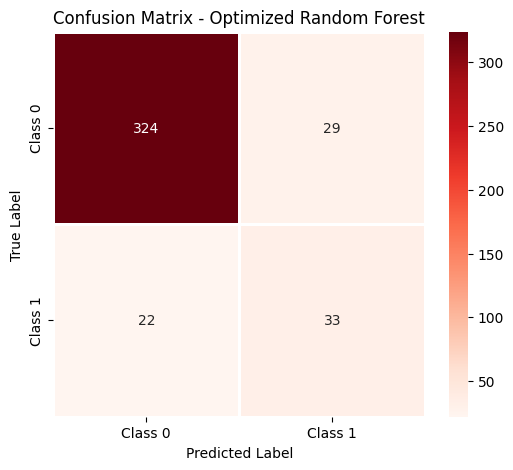

In [ ]:
cm_optimized = confusion_matrix(y_test['classification_quality'], y_pred_optimized)
df_optimized = pd.DataFrame(columns=["Class 0", "Class 1"],
                           index=["Class 0", "Class 1"],
                           data=cm_optimized)

plt.figure(figsize=(6, 5))
sns.heatmap(df_optimized, annot=True, cmap="Reds", fmt='.0f',
           linewidths=2, cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Optimized Random Forest")
plt.show()

In [ ]:
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-score', 'Precision', 'Recall'],
    'Baseline': [
        accuracy_score(y_test['classification_quality'], y_pred_baseline),
        f1_score(y_test['classification_quality'], y_pred_baseline),
        precision_score(y_test['classification_quality'], y_pred_baseline),
        recall_score(y_test['classification_quality'], y_pred_baseline)
    ],
    'Optimized': [
        accuracy_score(y_test['classification_quality'], y_pred_optimized),
        f1_score(y_test['classification_quality'], y_pred_optimized),
        precision_score(y_test['classification_quality'], y_pred_optimized),
        recall_score(y_test['classification_quality'], y_pred_optimized)
    ]
})

comparison_df['Improvement'] = comparison_df['Optimized'] - comparison_df['Baseline']
comparison_df['Improvement%'] = (comparison_df['Improvement'] / comparison_df['Baseline'] * 100).round(2)
print(comparison_df)


      Metric  Baseline  Optimized  Improvement  Improvement%
0   Accuracy  0.884804   0.875000    -0.009804         -1.11
1   F1-score  0.471910   0.564103     0.092192         19.54
2  Precision  0.617647   0.532258    -0.085389        -13.82
3     Recall  0.381818   0.600000     0.218182         57.14


### Logistic Regression

**Baseline Logistic Regression**

In [ ]:
std_x_train_for_lr = x_over[std_x_train_for_lr.columns]
std_x_train_for_lr

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-1.102960,0.552800,-1.178133,-0.064006,-0.464995,0.101318,1.767367,0.075439,-0.578839
1,-0.815901,0.580345,0.124947,2.223221,-0.898519,-0.320962,0.604878,-0.431829,-0.118844
2,-0.299194,0.112078,-0.200823,-0.381309,0.587850,0.373929,-0.363864,-0.649229,-1.130833
3,-0.873313,1.406699,0.124947,1.205207,-0.526927,-0.053696,1.379870,-0.721696,0.249152
4,1.078692,-0.934638,0.939372,2.157116,-0.186301,0.694648,-0.493029,0.075439,1.905133
...,...,...,...,...,...,...,...,...,...
1639,1.842865,0.039890,2.161009,2.186291,-1.001028,0.808922,-1.833673,1.104955,1.175482
1640,0.557269,-0.373867,0.702338,-0.539568,-0.715726,-0.184936,-0.141195,0.015952,0.876666
1641,0.463840,-1.536150,-0.511450,-0.533815,0.618816,0.544535,0.854203,1.529827,-0.204429
1642,0.988824,-0.525844,0.566400,-0.184344,-0.865310,-0.196242,-0.535139,-0.094712,1.043817


In [ ]:
log_reg_baseline = LogisticRegression(random_state=42, max_iter=1000)
log_reg_baseline.fit(std_x_train, y_train['classification_quality'])

# Dự đoán
y_pred_baseline_lr = log_reg_baseline.predict(std_x_test)
print("BASELINE LOGISTIC REGRESSION PERFORMANCE:")
print(f"Accuracy: {accuracy_score(y_test['classification_quality'], y_pred_baseline_lr):.4f}")
print(f"F1-score: {f1_score(y_test['classification_quality'], y_pred_baseline_lr):.4f}")
print(f"Precision: {precision_score(y_test['classification_quality'], y_pred_baseline_lr):.4f}")
print(f"Recall: {recall_score(y_test['classification_quality'], y_pred_baseline_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test['classification_quality'], y_pred_baseline_lr))

BASELINE LOGISTIC REGRESSION PERFORMANCE:
Accuracy: 0.8750
F1-score: 0.4270
Precision: 0.5588
Recall: 0.3455

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       353
           1       0.56      0.35      0.43        55

    accuracy                           0.88       408
   macro avg       0.73      0.65      0.68       408
weighted avg       0.86      0.88      0.86       408



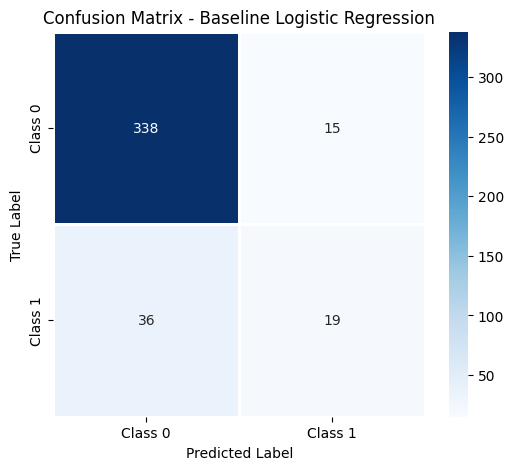

In [ ]:
cm_baseline_lr = confusion_matrix(y_test['classification_quality'], y_pred_baseline_lr)
df_baseline_lr = pd.DataFrame(columns=["Class 0", "Class 1"],
                              index=["Class 0", "Class 1"],
                              data=cm_baseline_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(df_baseline_lr, annot=True, cmap="Blues", fmt='.0f',
           linewidths=2, cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Baseline Logistic Regression")
plt.show()

In [ ]:
print(f"\nClass distribution in training set:")
unique, counts = np.unique(y_train['classification_quality'], return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {cls}: {count} samples ({count/len(y_train)*100:.1f}%)")


Class distribution in training set:
Class 0: 822 samples (86.4%)
Class 1: 129 samples (13.6%)


**Optimize Logistic Regression pipeline with GridsearchCV and use feature selection and oversampling data**

In [ ]:
std_x_train_for_lr = x_over[std_x_train_for_lr.columns]
std_x_train_for_lr

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-1.102960,0.552800,-1.178133,-0.064006,-0.464995,0.101318,1.767367,0.075439,-0.578839
1,-0.815901,0.580345,0.124947,2.223221,-0.898519,-0.320962,0.604878,-0.431829,-0.118844
2,-0.299194,0.112078,-0.200823,-0.381309,0.587850,0.373929,-0.363864,-0.649229,-1.130833
3,-0.873313,1.406699,0.124947,1.205207,-0.526927,-0.053696,1.379870,-0.721696,0.249152
4,1.078692,-0.934638,0.939372,2.157116,-0.186301,0.694648,-0.493029,0.075439,1.905133
...,...,...,...,...,...,...,...,...,...
1639,1.842865,0.039890,2.161009,2.186291,-1.001028,0.808922,-1.833673,1.104955,1.175482
1640,0.557269,-0.373867,0.702338,-0.539568,-0.715726,-0.184936,-0.141195,0.015952,0.876666
1641,0.463840,-1.536150,-0.511450,-0.533815,0.618816,0.544535,0.854203,1.529827,-0.204429
1642,0.988824,-0.525844,0.566400,-0.184344,-0.865310,-0.196242,-0.535139,-0.094712,1.043817


In [ ]:
std_x_test_for_lr = std_x_test[std_x_train_for_lr.columns]
std_x_test_for_lr

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.586253,0.332439,-0.526593,-0.064006,1.764559,-0.459941,-0.170115,-0.939096,-0.486840
1,-0.414018,-0.273554,0.776487,-0.592844,-0.991417,0.122699,-0.557612,-0.721696,-0.118844
2,0.791632,-0.604096,-0.363708,-0.381309,-0.960451,-0.112495,-0.234698,0.655173,1.721135
3,1.136104,0.332439,0.776487,0.464833,0.804612,1.229180,-0.170115,0.365306,-0.854836
4,-1.217784,0.607890,0.287832,-0.011122,-0.650791,-0.705825,1.702784,-0.141962,1.445139
...,...,...,...,...,...,...,...,...,...
403,2.456577,-0.824457,0.450717,0.359065,-0.186301,2.298244,-0.880526,0.220372,-0.578839
404,-0.414018,-0.604096,0.613602,0.147530,0.030461,0.053210,-0.622195,-0.431829,-0.394841
405,0.963868,-0.659186,2.161009,-0.539960,-1.022383,0.170807,-0.622195,-1.156497,1.261141
406,-0.988137,-0.769367,-1.015248,-0.592844,2.554192,-2.405637,-1.203439,-1.084030,0.985144


In [ ]:
log_reg = LogisticRegression(random_state=42)
cv_params = [
    {
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear'],
        'C': [0.01, 0.1, 1, 10],
        'max_iter': [100],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['l1'],
        'solver': ['liblinear'],
        'C': [0.01, 0.1, 1, 10],
        'max_iter': [100],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'l1_ratio': [0.5],
        'C': [0.01, 0.1, 1],
        'max_iter': [100],
        'class_weight': [None, 'balanced']
    }
]

print("Đang thực hiện GridSearchCV...")
log_reg_grid = GridSearchCV(
    estimator=log_reg,
    param_grid=cv_params,
    cv=5,
    scoring='f1',  # F1 score cho binary classification
    n_jobs=-1,
    verbose=1
)

# Huấn luyện GridSearch
log_reg_grid.fit(std_x_train_for_lr, y_over)

print("Best parameters:", log_reg_grid.best_params_)
print("Best cross-validation score:", log_reg_grid.best_score_)

Đang thực hiện GridSearchCV...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'C': 0.01, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.8203025892033178


In [ ]:
log_reg_optimized = LogisticRegression(**log_reg_grid.best_params_, random_state=42)
log_reg_optimized.fit(std_x_train_for_lr, y_over)

# Dự đoán với optimized model
y_pred_optimized_lr = log_reg_optimized.predict(std_x_test_for_lr)

# Đánh giá optimized model
print("OPTIMIZED LOGISTIC REGRESSION PERFORMANCE:")
print(f"Accuracy: {accuracy_score(y_test['classification_quality'], y_pred_optimized_lr):.4f}")
print(f"F1-score: {f1_score(y_test['classification_quality'], y_pred_optimized_lr):.4f}")
print(f"Precision: {precision_score(y_test['classification_quality'], y_pred_optimized_lr):.4f}")
print(f"Recall: {recall_score(y_test['classification_quality'], y_pred_optimized_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test['classification_quality'], y_pred_optimized_lr))

OPTIMIZED LOGISTIC REGRESSION PERFORMANCE:
Accuracy: 0.8235
F1-score: 0.5663
Precision: 0.4234
Recall: 0.8545

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       353
           1       0.42      0.85      0.57        55

    accuracy                           0.82       408
   macro avg       0.70      0.84      0.73       408
weighted avg       0.90      0.82      0.85       408



In [ ]:
comparison_df_lr = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-score', 'Precision', 'Recall'],
    'Baseline': [
        accuracy_score(y_test['classification_quality'], y_pred_baseline_lr),
        f1_score(y_test['classification_quality'], y_pred_baseline_lr),
        precision_score(y_test['classification_quality'], y_pred_baseline_lr),
        recall_score(y_test['classification_quality'], y_pred_baseline_lr)
    ],
    'Optimized': [
        accuracy_score(y_test['classification_quality'], y_pred_optimized_lr),
        f1_score(y_test['classification_quality'], y_pred_optimized_lr),
        precision_score(y_test['classification_quality'], y_pred_optimized_lr),
        recall_score(y_test['classification_quality'], y_pred_optimized_lr)
    ]
})

comparison_df_lr['Improvement'] = comparison_df_lr['Optimized'] - comparison_df_lr['Baseline']
comparison_df_lr['Improvement%'] = (comparison_df_lr['Improvement'] / comparison_df_lr['Baseline'] * 100).round(2)
print(comparison_df_lr)

      Metric  Baseline  Optimized  Improvement  Improvement%
0   Accuracy  0.875000   0.823529    -0.051471         -5.88
1   F1-score  0.426966   0.566265     0.139299         32.63
2  Precision  0.558824   0.423423    -0.135400        -24.23
3     Recall  0.345455   0.854545     0.509091        147.37


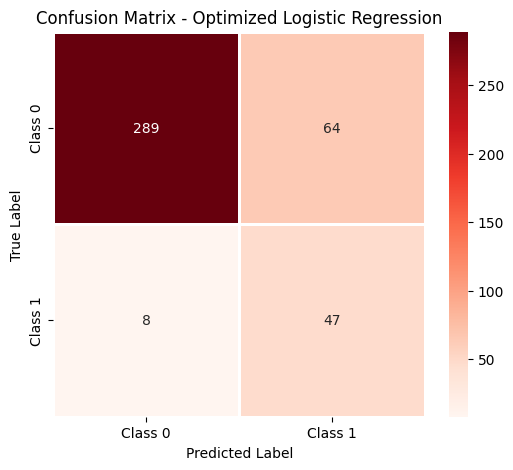

In [ ]:
cm_optimized_lr = confusion_matrix(y_test['classification_quality'], y_pred_optimized_lr)
df_optimized_lr = pd.DataFrame(columns=["Class 0", "Class 1"],
                               index=["Class 0", "Class 1"],
                               data=cm_optimized_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(df_optimized_lr, annot=True, cmap="Reds", fmt='.0f',
           linewidths=2, cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Optimized Logistic Regression")
plt.show()

### Compare 2 classification models

In [ ]:
optimized_models = {
    "Optimized Logistic Regression": log_reg_optimized,
    "Optimized Random Forest": rf_optimized
}

# Sử dụng test data đã được feature selection
test_data = {
    "Optimized Logistic Regression": std_x_test_for_lr,
    "Optimized Random Forest": std_x_test_for_rfc
}

print("Đang đánh giá các optimized models...")

# =====================================
# ĐÁNH GIÁ CÁC OPTIMIZED MODELS
# =====================================
results = {}

for name, model in optimized_models.items():
    print(f"\nĐánh giá {name}...")

    # Lấy dữ liệu test tương ứng
    x_test_data = test_data[name]

    # Dự đoán
    y_pred = model.predict(x_test_data)
    y_probs = model.predict_proba(x_test_data)[:, 1]  # Lấy xác suất của class 1

    # Tính AUC cho binary classification
    auc_score = roc_auc_score(y_test['classification_quality'], y_probs)

    # Lưu kết quả
    results[name] = {
        "AUC": auc_score,
        "Accuracy": accuracy_score(y_test['classification_quality'], y_pred),
        "F1-score": f1_score(y_test['classification_quality'], y_pred),
        "Precision": precision_score(y_test['classification_quality'], y_pred),
        "Recall": recall_score(y_test['classification_quality'], y_pred),
        "Classification Report": classification_report(y_test['classification_quality'], y_pred, output_dict=True),
        "Predictions": y_pred,
        "Probabilities": y_probs,
        "Test_Data": x_test_data
    }

    # In kết quả chi tiết
    print(f"\n{name} RESULTS:")
    print(f"AUC: {auc_score:.4f}")
    print(f"Accuracy: {accuracy_score(y_test['classification_quality'], y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test['classification_quality'], y_pred):.4f}")
    print(f"Precision: {precision_score(y_test['classification_quality'], y_pred):.4f}")
    print(f"Recall: {recall_score(y_test['classification_quality'], y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test['classification_quality'], y_pred))
    print("-" * 50)

Đang đánh giá các optimized models...

Đánh giá Optimized Logistic Regression...

Optimized Logistic Regression RESULTS:
AUC: 0.8875
Accuracy: 0.8235
F1-score: 0.5663
Precision: 0.4234
Recall: 0.8545

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       353
           1       0.42      0.85      0.57        55

    accuracy                           0.82       408
   macro avg       0.70      0.84      0.73       408
weighted avg       0.90      0.82      0.85       408

--------------------------------------------------

Đánh giá Optimized Random Forest...

Optimized Random Forest RESULTS:
AUC: 0.8866
Accuracy: 0.8750
F1-score: 0.5641
Precision: 0.5323
Recall: 0.6000

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       353
           1       0.53      0.60      0.56        55

    accuracy                           0.88       408
   mac

In [ ]:
comparison_df = pd.DataFrame({
    'Metric': ['AUC', 'Accuracy', 'F1-score', 'Precision', 'Recall'],
    'Optimized Logistic Regression': [
        results["Optimized Logistic Regression"]["AUC"],
        results["Optimized Logistic Regression"]["Accuracy"],
        results["Optimized Logistic Regression"]["F1-score"],
        results["Optimized Logistic Regression"]["Precision"],
        results["Optimized Logistic Regression"]["Recall"]
    ],
    'Optimized Random Forest': [
        results["Optimized Random Forest"]["AUC"],
        results["Optimized Random Forest"]["Accuracy"],
        results["Optimized Random Forest"]["F1-score"],
        results["Optimized Random Forest"]["Precision"],
        results["Optimized Random Forest"]["Recall"]
    ]
})

comparison_df['Difference (RF - LR)'] = (comparison_df['Optimized Random Forest'] -
                                        comparison_df['Optimized Logistic Regression'])
comparison_df['Winner'] = comparison_df.apply(
    lambda row: 'Random Forest' if row['Difference (RF - LR)'] > 0 else 'Logistic Regression',
    axis=1
)
comparison_df['Abs Difference'] = abs(comparison_df['Difference (RF - LR)'])

print("\nFINAL COMPARISON:")
print(comparison_df.round(4))


FINAL COMPARISON:
      Metric  Optimized Logistic Regression  Optimized Random Forest  \
0        AUC                         0.8875                   0.8866   
1   Accuracy                         0.8235                   0.8750   
2   F1-score                         0.5663                   0.5641   
3  Precision                         0.4234                   0.5323   
4     Recall                         0.8545                   0.6000   

   Difference (RF - LR)               Winner  Abs Difference  
0               -0.0009  Logistic Regression          0.0009  
1                0.0515        Random Forest          0.0515  
2               -0.0022  Logistic Regression          0.0022  
3                0.1088        Random Forest          0.1088  
4               -0.2545  Logistic Regression          0.2545  


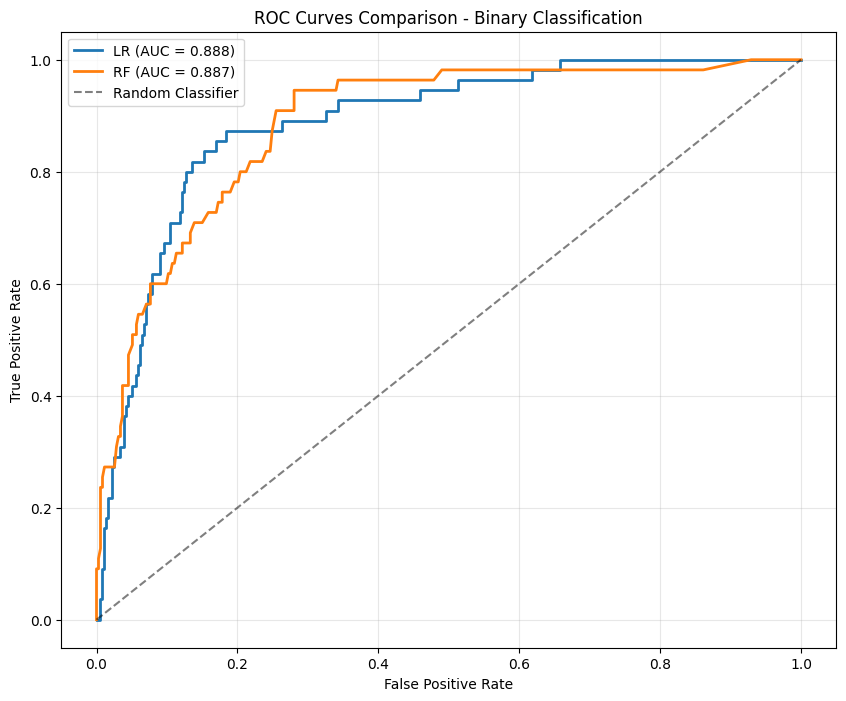

In [ ]:
plt.figure(figsize=(10, 8))

for name, model in optimized_models.items():
    x_test_data = test_data[name]
    y_probs = model.predict_proba(x_test_data)[:, 1]

    fpr, tpr, _ = roc_curve(y_test['classification_quality'], y_probs)
    auc_score = roc_auc_score(y_test['classification_quality'], y_probs)

    # Rút gọn tên model
    short_name = "LR" if "Logistic" in name else "RF"
    plt.plot(fpr, tpr, label=f'{short_name} (AUC = {auc_score:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison - Binary Classification')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


CONFUSION MATRICES COMPARISON


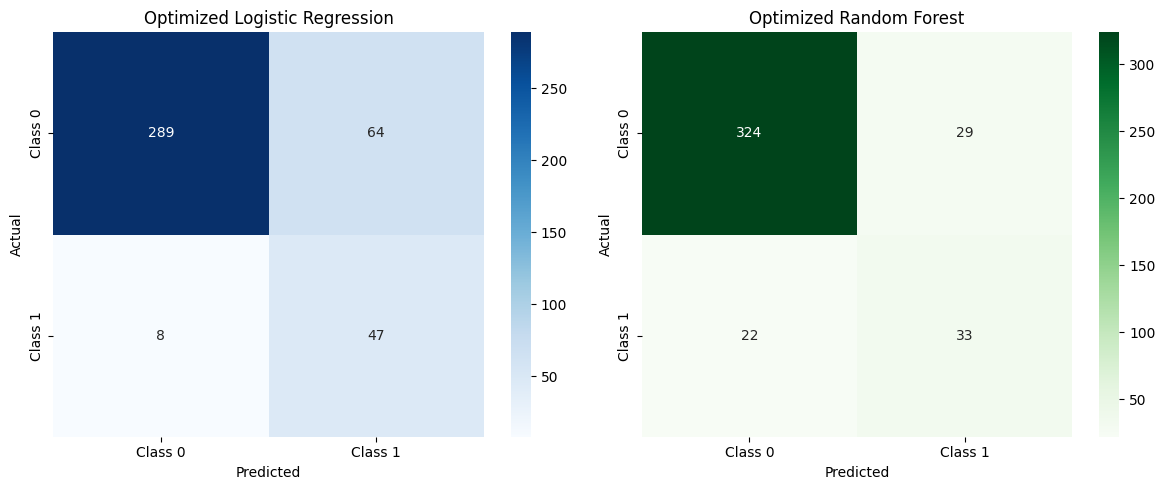

In [ ]:
print("\n" + "=" * 40)
print("CONFUSION MATRICES COMPARISON")
print("=" * 40)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Optimized Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test['classification_quality'],
                        results["Optimized Logistic Regression"]["Predictions"])
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0],
           xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
axes[0].set_title('Optimized Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Optimized Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test['classification_quality'],
                        results["Optimized Random Forest"]["Predictions"])
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
           xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
axes[1].set_title('Optimized Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


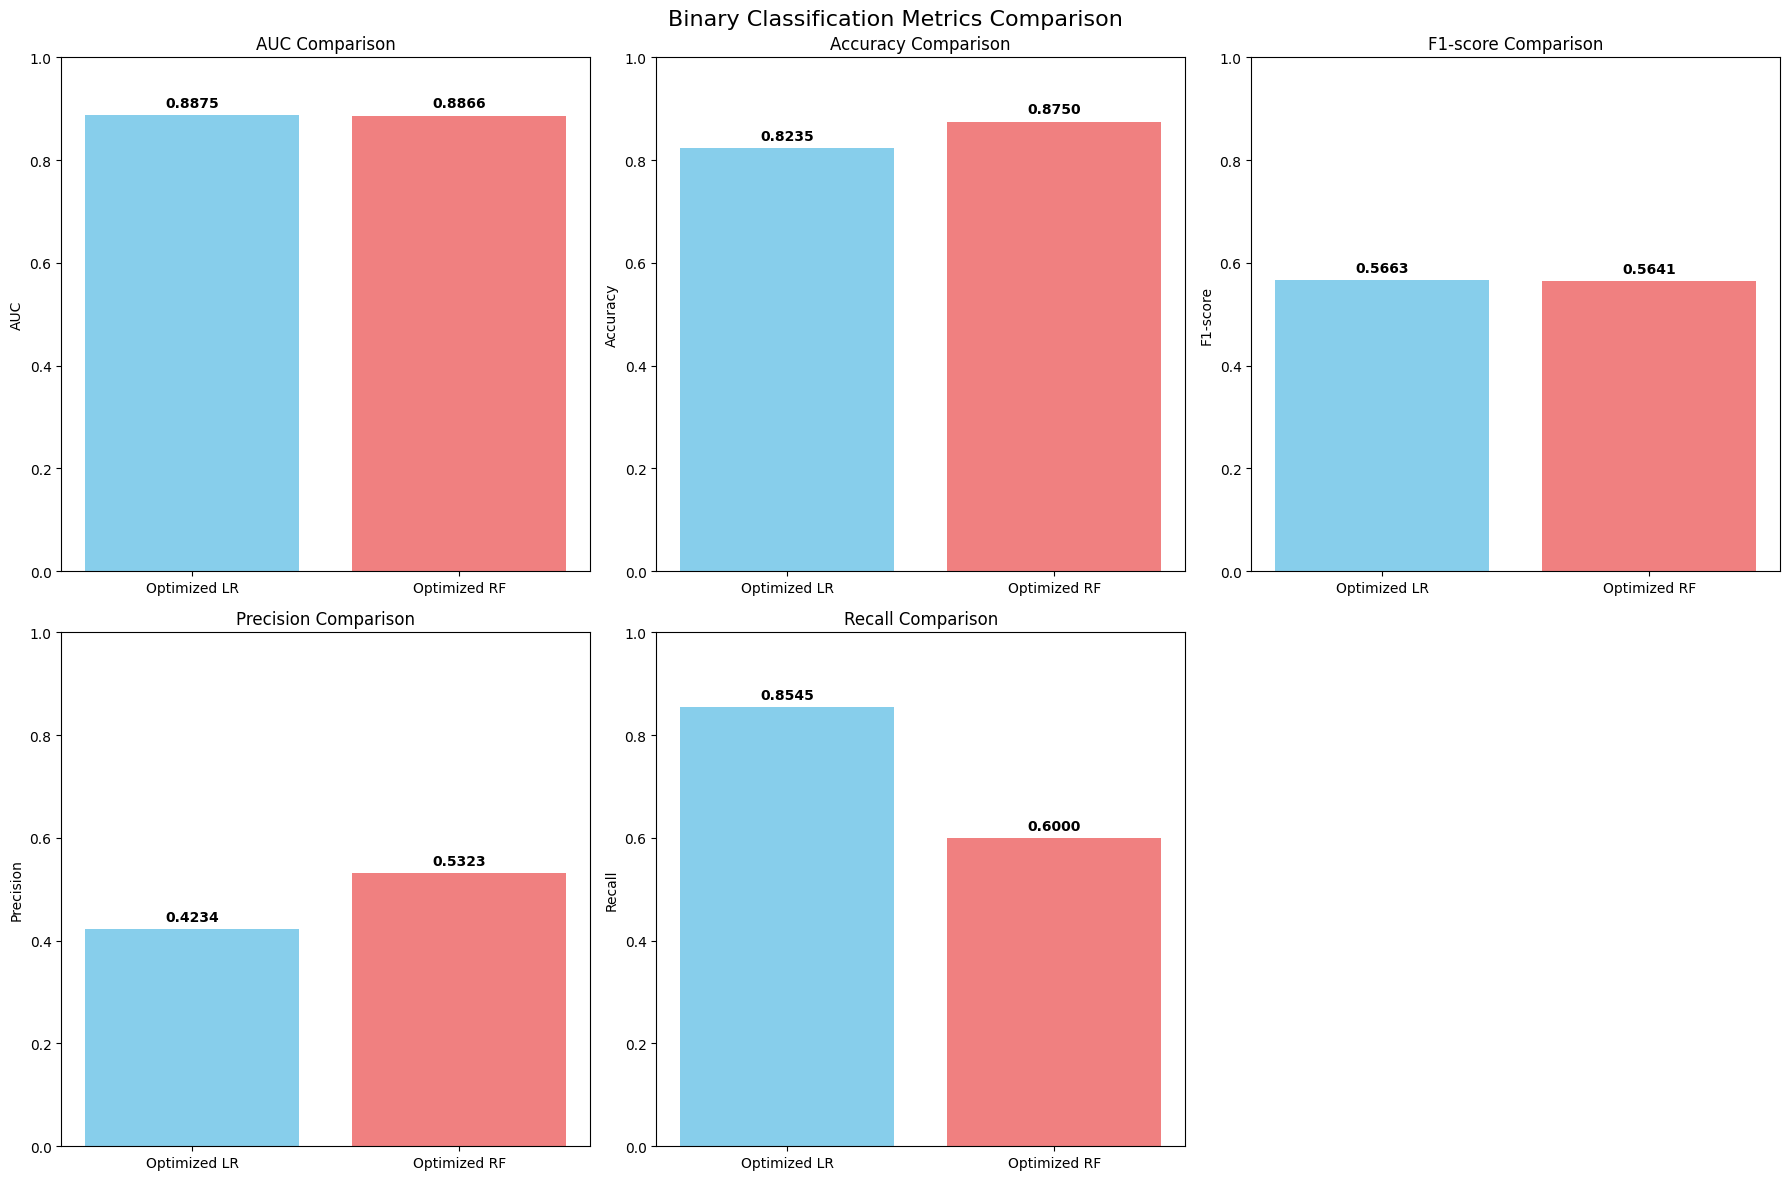

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Binary Classification Metrics Comparison', fontsize=16)

metrics_to_plot = ['AUC', 'Accuracy', 'F1-score', 'Precision', 'Recall']
colors = ['skyblue', 'lightcoral']

for idx, metric in enumerate(metrics_to_plot):
    row, col = idx // 3, idx % 3

    values = [results["Optimized Logistic Regression"][metric],
              results["Optimized Random Forest"][metric]]
    labels = ['Optimized LR', 'Optimized RF']

    bars = axes[row, col].bar(labels, values, color=colors)
    axes[row, col].set_title(f'{metric} Comparison')
    axes[row, col].set_ylabel(metric)
    axes[row, col].set_ylim(0, 1)

    # Thêm giá trị lên bars
    for bar, value in zip(bars, values):
        axes[row, col].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                           f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# Ẩn subplot cuối cùng (vì chỉ có 5 metrics)
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


Top 10 Important Features - Random Forest:
                 Feature  RF_Importance
10               alcohol       0.238753
9              sulphates       0.174621
1       volatile_acidity       0.107305
2            citric_acid       0.079926
6   total_sulfur_dioxide       0.071610
5    free_sulfur_dioxide       0.060983
0          fixed_acidity       0.060659
7                density       0.059915
4              chlorides       0.057555
8                     pH       0.047522

Top 10 Important Features - Logistic Regression:
                Feature  LR_Importance
8               alcohol       0.235853
7             sulphates       0.181244
1      volatile_acidity       0.134331
4  total_sulfur_dioxide       0.118905
0         fixed_acidity       0.105071
3             chlorides       0.094193
5               density       0.076763
2        residual_sugar       0.045568
6                    pH       0.008072


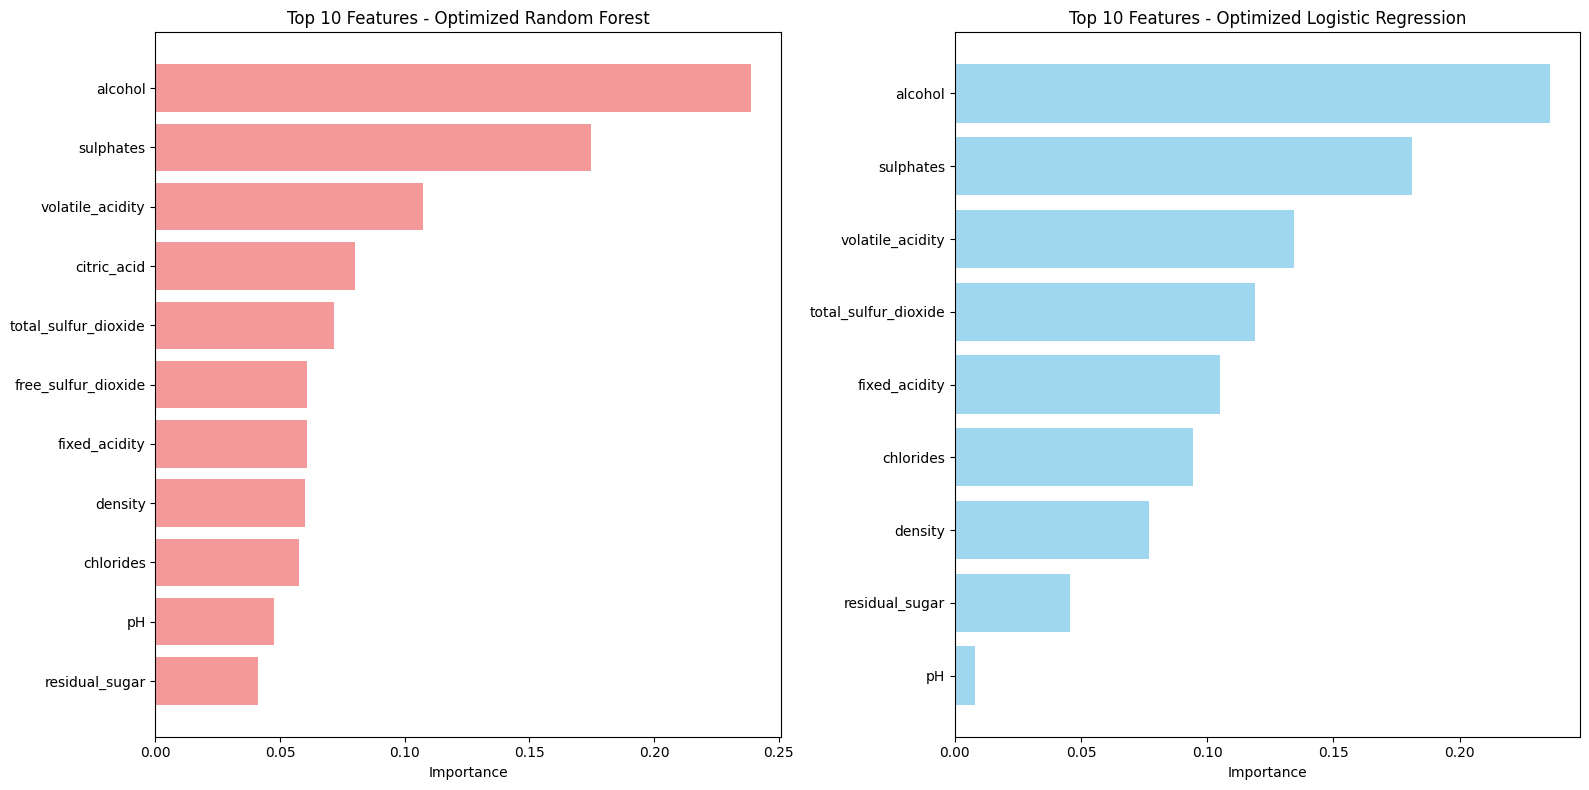

In [ ]:
rf_importance = pd.DataFrame({
    'Feature': std_x_test_for_rfc.columns,
    'RF_Importance': rf_optimized.feature_importances_
}).sort_values(by='RF_Importance', ascending=False)

# Logistic Regression Feature Importance (using coefficients)
lr_coefs = np.abs(log_reg_optimized.coef_[0])  # Binary classification has 1D coefficients
lr_importance_values = lr_coefs / np.sum(lr_coefs)  # Normalize

lr_importance = pd.DataFrame({
    'Feature': std_x_test_for_lr.columns,
    'LR_Importance': lr_importance_values
}).sort_values(by='LR_Importance', ascending=False)

print("Top 10 Important Features - Random Forest:")
print(rf_importance.head(10))

print("\nTop 10 Important Features - Logistic Regression:")
print(lr_importance.head(10))

# Visualize Feature Importance
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Random Forest Top Features
top_rf = rf_importance.head(15)
axes[0].barh(range(len(top_rf)), top_rf['RF_Importance'], color='lightcoral', alpha=0.8)
axes[0].set_yticks(range(len(top_rf)))
axes[0].set_yticklabels(top_rf['Feature'])
axes[0].set_xlabel('Importance')
axes[0].set_title('Top 10 Features - Optimized Random Forest')
axes[0].invert_yaxis()

# Logistic Regression Top Features
top_lr = lr_importance.head(15)
axes[1].barh(range(len(top_lr)), top_lr['LR_Importance'], color='skyblue', alpha=0.8)
axes[1].set_yticks(range(len(top_lr)))
axes[1].set_yticklabels(top_lr['Feature'])
axes[1].set_xlabel('Importance')
axes[1].set_title('Top 10 Features - Optimized Logistic Regression')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()